# ------------------------------Importing The Libraries---------------------------------------#

In [1]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import scipy.stats as st
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Overview  and Data Cleaning

In [2]:
#Reading the csv file in the dataframe 'data'
df=pd.read_csv('Postures.csv')    

In [3]:
#Checking the shape of the dataset
df.shape

(78096, 38)

In [4]:
df.columns

Index(['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2',
       'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6',
       'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10',
       'Z10', 'X11', 'Y11', 'Z11'],
      dtype='object')

In [5]:
#Checking the first 5 records of the dataset
df.head()

Class  User         X0         Y0         Z0         X1         Y1  \
0      0     0   0.000000   0.000000   0.000000   0.000000   0.000000   
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
4      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   

          Z1         X2         Y2  ...  Z8 X9 Y9 Z9 X10 Y10 Z10 X11 Y11 Z11  
0   0.000000   0.000000   0.000000  ...   0  0  0  0   0   0   0   0   0   0  
1 -72.780545  36.621229  81.680557  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
2 -49.596509  79.223743  43.254091  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
3 -50.606259  78.451526  43.567403  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
4 -52.752784  86.320630  68.214645  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  

[5 rows x 38 columns]

Inferences:-

1. We can see some missing values marked as '?' which means that camera was unabel to detect the marker's co-ordinate  or the marker was occluded.

2. The first row has values as 0.

In [6]:
df[0:1].values


array([[0, 0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
        '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']],
      dtype=object)

Inference- As observed all the values in the first row are 0, so we will drop this row and reset our index.


In [7]:
#Dropping the  first row

df=df.drop(0)

In [8]:
#Resetting the index in order to avoid errors during Data Manipulation.

df=df.reset_index().drop(columns='index')

In [9]:
#Replacing '?' with Null Values.  

df=df.replace('?',np.nan)

In [10]:
#Checking data info
df.info()

# We have majority dataypes as object datatype.
# Converting them into float datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78095 entries, 0 to 78094
Data columns (total 38 columns):
Class    78095 non-null int64
User     78095 non-null int64
X0       78095 non-null float64
Y0       78095 non-null float64
Z0       78095 non-null float64
X1       78095 non-null float64
Y1       78095 non-null float64
Z1       78095 non-null float64
X2       78095 non-null float64
Y2       78095 non-null float64
Z2       78095 non-null float64
X3       77405 non-null object
Y3       77405 non-null object
Z3       77405 non-null object
X4       74975 non-null object
Y4       74975 non-null object
Z4       74975 non-null object
X5       65072 non-null object
Y5       65072 non-null object
Z5       65072 non-null object
X6       52247 non-null object
Y6       52247 non-null object
Z6       52247 non-null object
X7       38943 non-null object
Y7       38943 non-null object
Z7       38943 non-null object
X8       30563 non-null object
Y8       30563 non-null object
Z8       30563 n

In [11]:
#Converting the object datatypes to float


df.iloc[:,2:]=df.iloc[:,2:].astype('float64')

In [12]:
#Checking if the datatype conversion succeeded?
df.info()
# Succeeded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78095 entries, 0 to 78094
Data columns (total 38 columns):
Class    78095 non-null int64
User     78095 non-null int64
X0       78095 non-null float64
Y0       78095 non-null float64
Z0       78095 non-null float64
X1       78095 non-null float64
Y1       78095 non-null float64
Z1       78095 non-null float64
X2       78095 non-null float64
Y2       78095 non-null float64
Z2       78095 non-null float64
X3       77405 non-null float64
Y3       77405 non-null float64
Z3       77405 non-null float64
X4       74975 non-null float64
Y4       74975 non-null float64
Z4       74975 non-null float64
X5       65072 non-null float64
Y5       65072 non-null float64
Z5       65072 non-null float64
X6       52247 non-null float64
Y6       52247 non-null float64
Z6       52247 non-null float64
X7       38943 non-null float64
Y7       38943 non-null float64
Z7       38943 non-null float64
X8       30563 non-null float64
Y8       30563 non-null float64

In [13]:
#Checking the dataset with the above changes.

df.head()

#Now we can see that our dataset has Null Values or Missing Values instead of '?'
#Also we have successfully dropped the first row which had  0's.

Class  User         X0         Y0         Z0         X1         Y1  \
0      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
1      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
2      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
3      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   
4      1     0  55.142401  71.435607 -64.177303  36.175818  81.556874   

          Z1         X2         Y2  ...  Z8  X9  Y9  Z9  X10  Y10  Z10  X11  \
0 -72.780545  36.621229  81.680557  ... NaN NaN NaN NaN  NaN  NaN  NaN  NaN   
1 -49.596509  79.223743  43.254091  ... NaN NaN NaN NaN  NaN  NaN  NaN  NaN   
2 -50.606259  78.451526  43.567403  ... NaN NaN NaN NaN  NaN  NaN  NaN  NaN   
3 -52.752784  86.320630  68.214645  ... NaN NaN NaN NaN  NaN  NaN  NaN  NaN   
4 -53.475747  76.986143  42.426849  ... NaN NaN NaN NaN  NaN  NaN  NaN  NaN   

   Y11  Z11  
0  NaN  NaN  
1  NaN  NaN  
2  NaN  NaN  
3  NaN  NaN  
4  NaN  NaN  

[5 rows x 38 columns]

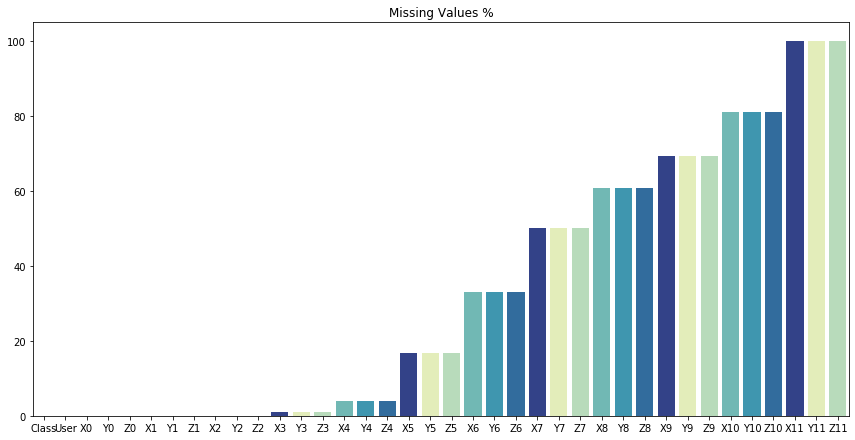

In [14]:
#Checking for null values
null_values=df.isnull().sum()/len(df)*100
plt.figure(figsize=(12,6))
sns.barplot(null_values.index,null_values.values,palette=sns.color_palette("YlGnBu"))
plt.tight_layout()
plt.title('Missing Values %')
plt.show()
# Too many null values

Inference- In the last 12 columns(i.e. 4 markers) we have missing values more than 50%

In [15]:
#Imputing the missing values with 0 until we come up a with a better idea.
#The markers are occluded from the camera so we fill the missing values with 0 (i.e.they are at Origin)

df_null=df.fillna(0)

In [16]:
#Checking for the null values after imputation
df_null.isnull().sum().sum()

0

# Exploratory Data Analysis

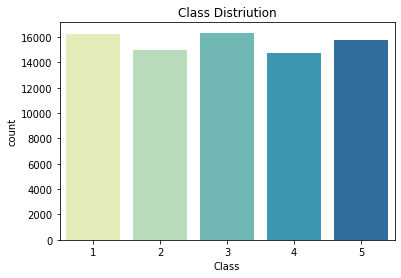

3    16344
1    16265
5    15733
2    14978
4    14775
Name: Class, dtype: int64

In [17]:
# Checking the Class Distribution
sns.countplot(df_null.Class,palette=sns.color_palette("YlGnBu"))
plt.title('Class Distriution')
plt.show()
df_null.Class.value_counts()


Inference:-
  Here the **Class** is our Target column and by seeing the above count plot we can infer that our Target column is balanced.

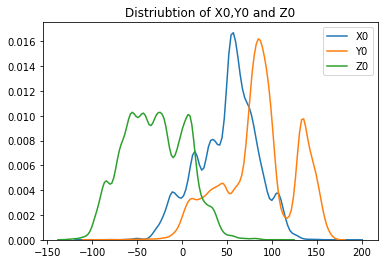

In [18]:
# Checking the distribution of X0,Y0,Z0 using Kernel Density Plot
sns.kdeplot(df_null.X0)
sns.kdeplot(df_null.Y0)
sns.kdeplot(df_null.Z0)
plt.title('Distriubtion of X0,Y0 and Z0')
plt.show()



Inference:-

The X0 feature has values in the middle range i.e. it ranges from -50 to 150.

The Y0 feature has values in the highest range i.e. it ranges from -50 to 200.

The Z0 feature has values in the lowest range i.e. it ranges from -150 to 100.(It has the  highest number of negative values.)

We cannot draw inferences here because X0,Y0,Z0 has values that do not represent a single marker but it contains values from different markers. 


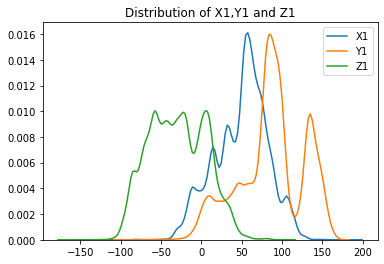

In [19]:
# Checking the distribution of X1,Y1,Z1 using Kernel Density Plot
sns.kdeplot(df_null.X1)
sns.kdeplot(df_null.Y1)
sns.kdeplot(df_null.Z1)
plt.title('Distribution of X1,Y1 and Z1')
plt.show()


Inference:-

From the above graph we can infer that the feautures are not normally distributed.

When compared with the above graph which shows the distribution of X0,Y0,Z0 features we can arrive to a conclusion that (Xi,Yi,Zi) features are very similar.

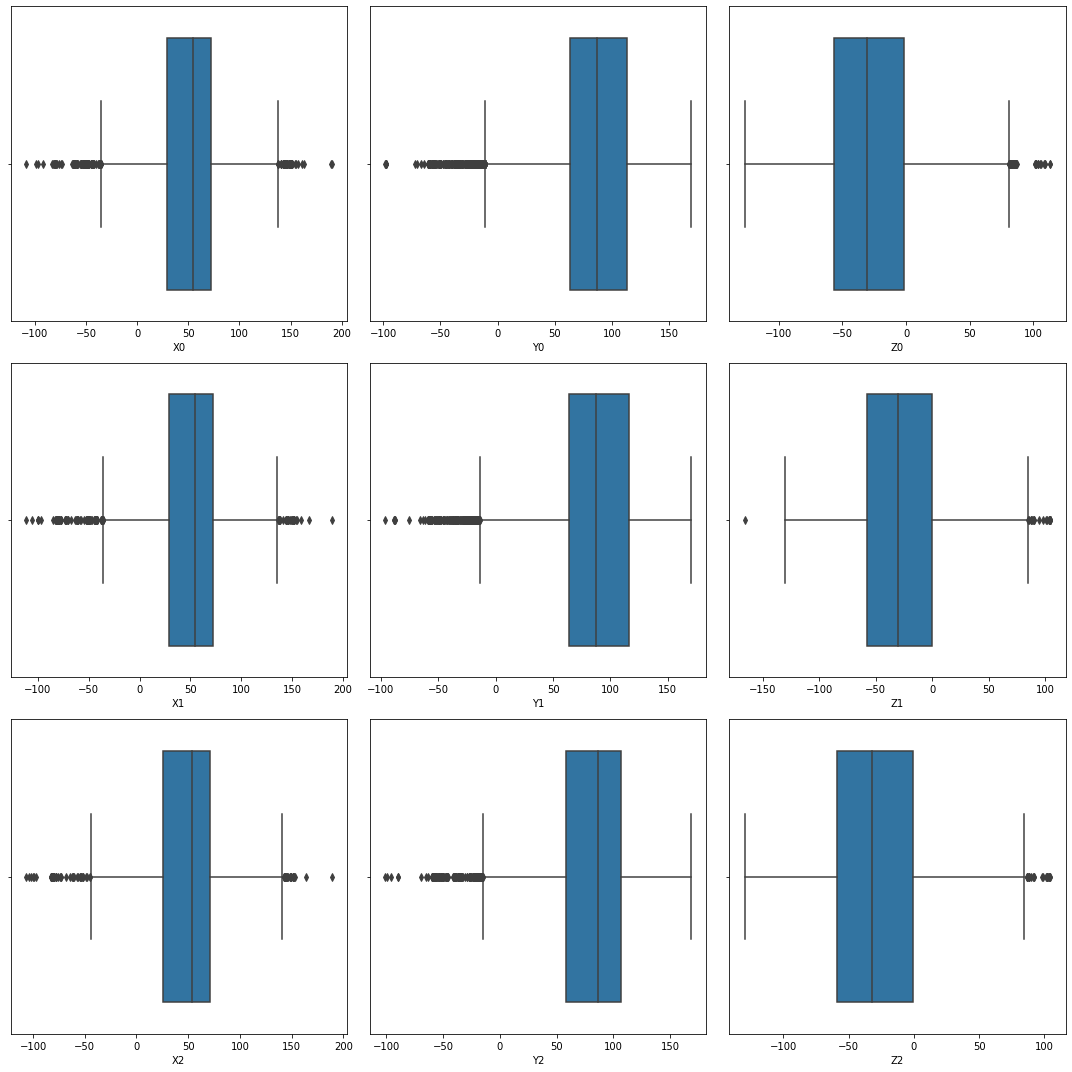

In [20]:
# Checking the distribution of X0,Y0,Z0 using box plot
fig,ax=plt.subplots(3,3,figsize=(15,15))
sns.boxplot(df_null.X0,ax=ax[0,0])
sns.boxplot(df_null.Y0,ax=ax[0,1])
sns.boxplot(df_null.Z0,ax=ax[0,2])
sns.boxplot(df_null.X1,ax=ax[1,0])
sns.boxplot(df_null.Y1,ax=ax[1,1])
sns.boxplot(df_null.Z1,ax=ax[1,2])
sns.boxplot(df_null.X2,ax=ax[2,0])
sns.boxplot(df_null.Y2,ax=ax[2,1])
sns.boxplot(df_null.Z2,ax=ax[2,2])
plt.tight_layout()
plt.show()

Inference:-

We can see the Distribution of X0 is similar to the distribution of X1 and X2.
Also the distribution of Y0 similar to the distribution of  Y1 and Y2.
Same is the case where Z0 has similar distribution to that of Z1 and Z2.

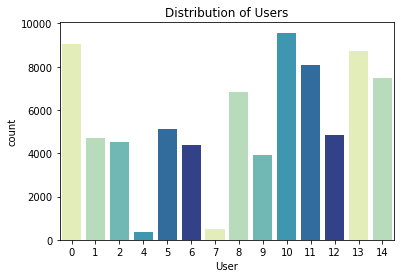

10    9573
0     9048
13    8739
11    8061
14    7495
8     6811
5     5105
12    4865
1     4717
2     4513
6     4377
9     3920
7      492
4      379
Name: User, dtype: int64

In [21]:
#Checking the distribution of Users using countplot
sns.countplot(df_null.User,palette=sns.color_palette("YlGnBu"))
plt.title('Distribution of Users')
plt.show()
df_null.User.value_counts()

Inference:-

**Users** 7 and 4 have very low values as compared to other **Users**.

Class 1


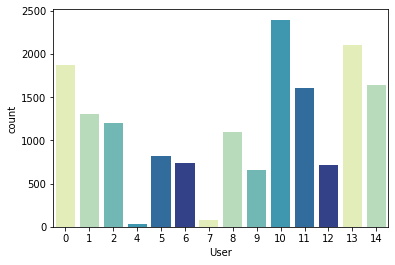

10    2397
13    2107
0     1872
14    1647
11    1604
1     1307
2     1198
8     1097
5      820
6      738
12     712
9      653
7       84
4       29
Name: User, dtype: int64
Class 2


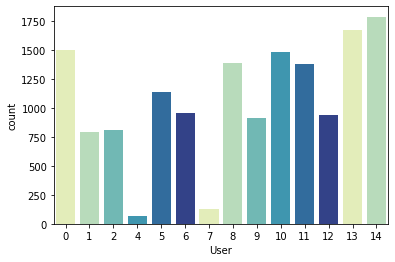

14    1790
13    1671
0     1501
10    1481
8     1392
11    1380
5     1143
6      962
12     941
9      918
2      808
1      796
7      124
4       71
Name: User, dtype: int64
Class 3


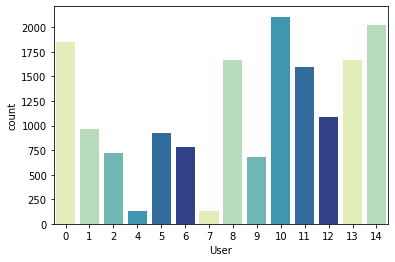

10    2108
14    2020
0     1851
13    1672
8     1670
11    1601
12    1087
1      968
5      926
6      779
2      721
9      676
7      134
4      131
Name: User, dtype: int64
Class 4


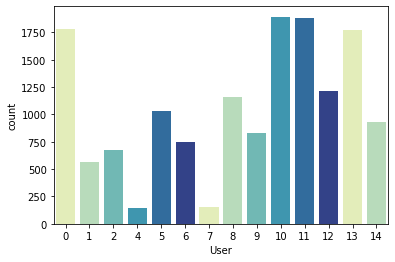

10    1894
11    1881
0     1781
13    1771
12    1212
8     1160
5     1033
14     931
9      832
6      744
2      677
1      561
7      150
4      148
Name: User, dtype: int64
Class 5


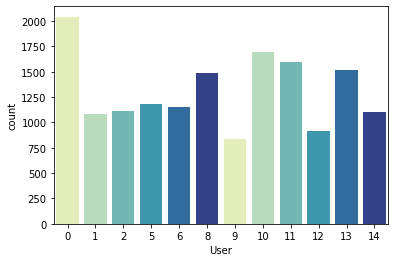

0     2043
10    1693
11    1595
13    1518
8     1492
5     1183
6     1154
2     1109
14    1107
1     1085
12     913
9      841
Name: User, dtype: int64


In [22]:
#Class-Wise Distribution of User

for i in df_null.Class.unique():
    print('Class',i)
    sns.countplot(df_null[df_null.Class==i].User,palette=sns.color_palette("YlGnBu"))
    plt.show()
    print(df_null[df_null.Class==i].User.value_counts())
    

Inference:

1. It is evident from the subplots above that **Users** 7 and 4 have only 4 postures namely 1,2,3,4 and 5th posture is missing.

2. Also **Users** 7 and 4 have very less amount of values as compared to **Users**.

3. For the time being  we will drop **Users** 7 and 4. 

In [23]:
#Dropping Users 7 and 4 from the dataframe.
for i in (7,4):
    indexes=df_null[df_null.User==i].index
    df_null=df_null.drop(indexes)

In [24]:
#Checking the shape of the dataframe after dropping Users 7 and 4
df_null.shape

(77224, 38)

### Multicollinearity test

In [25]:
#Multi-Collinearity Test using Variance-Inflation Factor
multicollinearity=pd.Series([variance_inflation_factor(df_null.drop(columns=['Class','User']).values,i) for i in range(df_null.drop(columns=['Class','User']).shape[1])],index=df_null.drop(columns=['Class','User']).columns)
multicollinearity

X0     3.913310
Y0     6.969887
Z0     3.661890
X1     3.989787
Y1     7.479833
Z1     4.021941
X2     3.851970
Y2     7.535271
Z2     4.278780
X3     3.871253
Y3     7.397223
Z3     4.347547
X4     3.695952
Y4     6.300925
Z4     3.874183
X5     3.196289
Y5     4.703725
Z5     2.706971
X6     2.890811
Y6     4.127127
Z6     2.193066
X7     2.590411
Y7     4.367300
Z7     1.790091
X8     2.979416
Y8     4.108713
Z8     2.057466
X9     2.888104
Y9     3.145852
Z9     2.103399
X10    3.416222
Y10    2.255941
Z10    2.547151
X11    1.887607
Y11    1.214895
Z11    1.656199
dtype: float64

# Base Model: Multiclass Logistic Regression

Classification can be done by algorithms like:-
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Naive Bayes
5. K- Nearest Neighbours
6. Support Vector Machines

### Traditional Train Test Split

In [26]:
#Performing Train-Test Split to get the train and test data.
X_train,X_test,y_train,y_test=train_test_split(df_null.drop(columns=['Class','User']),df_null.Class,shuffle=True,test_size=0.3,random_state=42)

In [28]:
# Logistic Regression One vs Rest

lr=LogisticRegression(random_state=42,multi_class='ovr')
lr.fit(X_train,y_train)
test_score=f1_score(y_test,lr.predict(X_test),average='weighted')
print('Test Score for Logistic Regression One Vs Rest is:', test_score)

Test Score for Logistic Regression One Vs Rest is: 0.7913384484759948


In [29]:
#Logistic Regression Multinomial
lr=LogisticRegression(random_state=42,multi_class='multinomial')
lr.fit(X_train,y_train)
test_score1=f1_score(y_test,lr.predict(X_test),average='weighted')
print('Test Score for Logistic Regression Multinomial is:', test_score1)

Test Score for Logistic Regression Multinomial is: 0.7733239469428259


In [30]:
# Decision Tree
dt=DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
test_score2=f1_score(y_test,dt.predict(X_test),average='weighted')
print('Test Score for Decision Tree is:', test_score2)

Test Score for Decision Tree is: 0.9645208270771177


In [31]:
# Random Forest
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
test_score3=f1_score(y_test,rf.predict(X_test),average='weighted')
print('Test Score for Random Forest is:', test_score3)

Test Score for Random Forest is: 0.9911936273822417


Inference:

We get a very high score of 99% : 

Possibly the reason can be - We have similar values of different class of different Users on Train Data as well as on the Test Data that's why our Test result is 99%.
    
To overcome this situation we need to make a methodology that can tell whether the model working good on a unseen data or not. To achieve this we  made a user defined function that will make use of User column and will evaluate the model on One-User-Out- Basis.

In [17]:
def One_User_Out(data,model):
    '''  
    Input: dataframe , Model object
    
    Returns: Train_score,Test_score
    '''
    sc=StandardScaler()
    user=data.User.unique()
    test_score=[]
    train_score=[]
    for i in user:
        X_train=data[data.User!=i].drop(columns=['User','Class'])
        y_train=data[data.User!=i].Class
        X_test=data[data.User==i].drop(columns=['User','Class'])
        y_test=data[data.User==i].Class
        
        X_train_scaled=sc.fit_transform(X_train)
        X_test_scaled=sc.transform(X_test)
        
        model.fit(X_train_scaled,y_train)
        train_score.append(f1_score(y_train,model.predict(X_train_scaled),average='weighted'))
        
        test_score.append(f1_score(y_test,model.predict(X_test_scaled),average='weighted'))
    return(train_score,test_score)

Checking the score of Logistic Regression, Decision Tree and Random Forest using One_User_Out Function.

In [327]:
lr=LogisticRegression(random_state=42,solver='saga')
train_score,test_score=One_User_Out(df_null,lr)
print('Logistic Regression')
print('Training Score',np.mean(train_score),'Training var',np.var(train_score,ddof=1))
print('Testing Score',np.mean(test_score),'Testing var',np.var(test_score,ddof=1))

Logistic Regression
Training Score 0.8587448348274975 Training var 4.8639136975028196e-05
Testing Score 0.7176978654692855 Testing var 0.016367817046444015


In [328]:
dt=DecisionTreeClassifier(random_state=42)
train_score,test_score=One_User_Out(df_null,dt)
print('Decision Tree')
print('Training Score',np.mean(train_score),'Training var',np.var(train_score,ddof=1))
print('Testing Score',np.mean(test_score),'Testing var',np.var(test_score,ddof=1))

Decision Tree
Training Score 1.0 Training var 0.0
Testing Score 0.6858153635399545 Testing var 0.018521549109689502


In [329]:
rf=RandomForestClassifier(random_state=42)
train_score,test_score=One_User_Out(df_null,rf)
print('Random Forest')
print('Training Score',np.mean(train_score),'Training var',np.var(train_score,ddof=1))
print('Testing Score',np.mean(test_score),'Testing var',np.var(test_score,ddof=1))

Random Forest
Training Score 1.0 Training var 0.0
Testing Score 0.7355589647304891 Testing var 0.019293664251509593


Inference:-

Here the scores of Decision Tree and Random Forest is highly reduced. The reason could be that we have unlabelled and unordered data in our datset.


Let's see whether Voting Measure will help or not. 
Here we will transform our data in such a way that each row in original dataset will be transformed to 12 rows in the new dataframe. (Here we are assuming that it will reduce the effect of above mentioned problem.)

Before using this data in One_User_Out methodology let's use this once for traditional train test split.

In [196]:
def voting_measure(data):
    data_index =[i for i in data.index for j in range(12)]
    data_Class=[i for i in data.Class.values.tolist() for j in range(12)]
    #data_User=[i for i in data.User.values.tolist() for j in range(12)]

    array=data.iloc[:,2:].values.reshape(-1,3)

    record=pd.DataFrame(array,columns=['X','Y','Z'])

    record['Row_lable']=data_index
    record['Class']=data_Class
    #record['User']=data_User
    return(record)

In [195]:
train,test=train_test_split(df_null,test_size=0.3,shuffle=True,random_state=42)

In [198]:
train_record=voting_measure(train)
test_record=voting_measure(test)

In [200]:
lr=LogisticRegression(solver='saga',random_state=42)

In [202]:
X_train=train_record.drop(columns=['Row_lable','Class'])
y_train=train_record.Class
X_test=test_record.drop(columns=['Row_lable','Class'])
y_test=test_record.Class

In [203]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
y_train_pred=lr.predict(X_train)

In [206]:
train_record['predict']=y_train_pred

In [207]:
train_pred=train_record.groupby('Row_lable').apply(lambda x: x.predict.mode()[0])

In [209]:
f1_score(train.Class,train_pred,average='weighted')

0.13505451526213608

So our assumption was wrong it is giving very poor result even on traditional train test split. So we go for Feature Engineering.

To overcome the above problem we extract features that will not depend on the location of the marker i.e. Aggregate features such as Number of Markers, Mean, Variance and Co-variance and Dimension of Bounding Box.

# Feature Engineering  - Aggregate features

In [210]:
def Aggregate_features(df):
    def xy_cov(df):
        x=df[x_col]
        y=df[y_col]
        x2 = x.dropna()
        y2 = y.dropna()
        xy = 0
        x2_mean = x2.mean()
        y2_mean = y2.mean()
        for i in range(x2.size):
            xy += (x2.iloc[i] - x2_mean)*(y2.iloc[i] - y2_mean)
        return xy / (x2.size - 1)
    def yz_cov(df):
        y=df[y_col]
        z=df[z_col]
        y2 = y.dropna()
        z2 = z.dropna()
        yz = 0
        y2_mean = y2.mean()
        z2_mean = z2.mean()
        for i in range(y2.size):
            yz += (y2.iloc[i] - y2_mean)*(z2.iloc[i] - z2_mean)
        return yz / (y2.size - 1)
    
    def xz_cov(df):
        x=df[x_col]
        z=df[z_col]
        x2 = x.dropna()
        z2 = z.dropna()
        xz = 0
        x2_mean = x2.mean()
        z2_mean = z2.mean()
        for i in range(x2.size):
            xz += (x2.iloc[i] - x2_mean)*(z2.iloc[i] - z2_mean)
        return xz / (x2.size - 1)
    
    

    data=pd.DataFrame()
    data['Class']=df.Class
    data['User']=df.User
    markers=(df.notnull().sum(axis=1)-2)/3
    data['Num_of_Markers']=markers
    x_col=['X0','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11']
    y_col=['Y0','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8','Y9','Y10','Y11']
    z_col=['Z0','Z1','Z2','Z3','Z4','Z5','Z6','Z7','Z8','Z9','Z10','Z11']
    
    #Mean of X,Y and Z
    x_mean=df[x_col].mean(axis=1)
    data['X_mean']=x_mean
    y_mean=df[y_col].mean(axis=1)
    data['Y_mean']=y_mean
    z_mean=df[z_col].mean(axis=1)
    data['Z_mean']=z_mean
    
    # Variance of X,Y and Z
    x_var=df[x_col].var(axis=1,ddof=1)
    data['X_var']=x_var
    y_var=df[y_col].var(axis=1,ddof=1)
    data['Y_var']=y_var
    z_var=df[z_col].var(axis=1,ddof=1)
    data['Z_var']=z_var
    
    # Covariance between X and Y
    xy_cov=df.apply(xy_cov, axis=1)
    data['XY_cov']=xy_cov
        
    # Covariance between Y and Z
    yz_cov =df.apply(yz_cov, axis=1)
    data['YZ_cov']=yz_cov
        
    # Covariance between X and Z
    xz_cov =df.apply(xz_cov, axis=1)
    data['XZ_cov']=xz_cov
        
    # X Dimension

    x_dim = np.max(df[x_col], axis=1)-np.min(df[x_col], axis=1)
    data['X_dim'] = x_dim

    # Y Dimension

    y_dim = np.max(df[y_col], axis=1)-np.min(df[y_col], axis=1)
    data['Y_dim'] = y_dim

    # Z Dimension

    z_dim = np.max(df[z_col], axis=1)-np.min(df[z_col], axis=1)
    data['Z_dim'] = z_dim
    return(data)
        
    

In [213]:
data=Aggregate_features(df)

In [214]:
data.head()

Class  User  Num_of_Markers     X_mean     Y_mean     Z_mean       X_var  \
0      1     0             5.0  62.440317  54.807598 -67.097888  368.120574   
1      1     0             5.0  64.785121  55.647991 -64.209132  364.625268   
2      1     0             5.0  64.162415  55.873836 -64.771039  369.632067   
3      1     0             5.0  63.439104  55.151830 -65.928355  377.415042   
4      1     0             5.0  63.189702  54.832340 -66.390470  381.445880   

        Y_var      Z_var      XY_cov      YZ_cov      XZ_cov      X_dim  \
0  816.727481  74.897086 -142.510146  147.356460 -150.851339  48.611035   
1  809.982596  78.885669 -144.142900  155.512996 -152.345094  48.314895   
2  813.945768  74.420553 -152.368059  146.664366 -151.848714  48.846584   
3  810.107918  66.130036 -161.489736  128.851696 -148.939518  49.758767   
4  812.447612  63.733840 -159.889770  126.648243 -146.701673  50.192930   

       Y_dim      Z_dim  
0  71.001621  20.764858  
1  70.758611  21.107482  
2  70.837907  20.532085  
3  70.618101  19.475677  
4  70.715764  19.098996

In [215]:
data.shape

(78095, 15)

In [216]:
# Saving the dataframe to a csv file
data.to_csv('Aggregate.csv',header=True,index=False)

In [2]:
#Reading from csv file
df1=pd.read_csv('Aggregate.csv')
df1.head()

Unnamed: 0  Class  User  num_of_markers     x_mean     y_mean     z_mean  \
0           1      1     0             5.0  62.440317  54.807598 -67.097888   
1           2      1     0             5.0  64.785121  55.647991 -64.209132   
2           3      1     0             5.0  64.162415  55.873836 -64.771039   
3           4      1     0             5.0  63.439104  55.151830 -65.928355   
4           5      1     0             5.0  63.189702  54.832340 -66.390470   

        x_var       y_var      z_var      xy_cov      yz_cov      xz_cov  \
0  368.120574  816.727481  74.897086 -142.510146  147.356460 -150.851339   
1  364.625268  809.982596  78.885669 -144.142900  155.512996 -152.345094   
2  369.632067  813.945768  74.420553 -152.368059  146.664366 -151.848714   
3  377.415042  810.107918  66.130036 -161.489736  128.851696 -148.939518   
4  381.445880  812.447612  63.733840 -159.889770  126.648243 -146.701673   

       x_dim      y_dim      z_dim  
0  48.611035  71.001621  20.764858  
1  48.314895  70.758611  21.107482  
2  48.846584  70.837907  20.532085  
3  49.758767  70.618101  19.475677  
4  50.192930  70.715764  19.098996

In [3]:
df1=df1.drop(columns=['Unnamed: 0'],axis=1)

In [4]:
# Dropping Users 4 and 7 
df1.drop(df1[(df1.User==4)|(df1.User==7)].index,inplace=True)

In [5]:
df1.groupby(['num_of_markers','Class']).User.count()


num_of_markers  Class
3.0             1          650
                3           10
                5            6
4.0             1         1381
                2           28
                3          881
                4            4
                5           41
5.0             1         4961
                2           37
                3         4543
                4          154
                5           38
6.0             1         6525
                2          134
                3         4278
                4         1473
                5          242
7.0             1         2584
                2           61
                3         2828
                4         7141
                5          506
8.0             1            3
                2           60
                3         3462
                4         3374
                5         1365
9.0             2          974
                3           77
                4         2318
                5

Inference:-

Records for Number of markers <=4 are very less as compared to others.

So will drop all the rows with Number of markers <= 4.

In [6]:
data=df1[df1.num_of_markers>4]

In [7]:
data.shape

(74223, 15)

# EDA on Aggregate feature dataset

In [226]:
data.head()

Class  User  Num_of_Markers     X_mean     Y_mean     Z_mean       X_var  \
0      1     0             5.0  62.440317  54.807598 -67.097888  368.120574   
1      1     0             5.0  64.785121  55.647991 -64.209132  364.625268   
2      1     0             5.0  64.162415  55.873836 -64.771039  369.632067   
3      1     0             5.0  63.439104  55.151830 -65.928355  377.415042   
4      1     0             5.0  63.189702  54.832340 -66.390470  381.445880   

        Y_var      Z_var      XY_cov      YZ_cov      XZ_cov      X_dim  \
0  816.727481  74.897086 -142.510146  147.356460 -150.851339  48.611035   
1  809.982596  78.885669 -144.142900  155.512996 -152.345094  48.314895   
2  813.945768  74.420553 -152.368059  146.664366 -151.848714  48.846584   
3  810.107918  66.130036 -161.489736  128.851696 -148.939518  49.758767   
4  812.447612  63.733840 -159.889770  126.648243 -146.701673  50.192930   

       Y_dim      Z_dim  
0  71.001621  20.764858  
1  70.758611  21.107482  
2  70.837907  20.532085  
3  70.618101  19.475677  
4  70.715764  19.098996

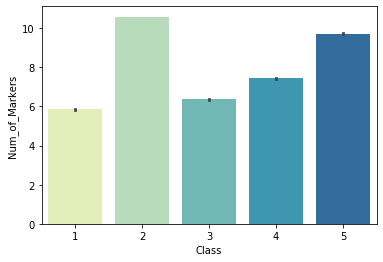

Class
1     5.849090
2    10.579736
3     6.358178
4     7.433082
5     9.720834
Name: Num_of_Markers, dtype: float64

In [228]:
# Class wise Num of Markers
sns.barplot(x='Class',y='Number of Markers',data=data,palette=sns.color_palette("YlGnBu"))
plt.show()
data.groupby('Class').Num_of_Markers.mean()

Inference:-

It is evident from the above graph that Class 2(i.e. flat hand) has the highest number of visible markers and second highest is the Class 5 (i.e. Hand posture - grab) which is also having significantly higher number of markers as compared to others.

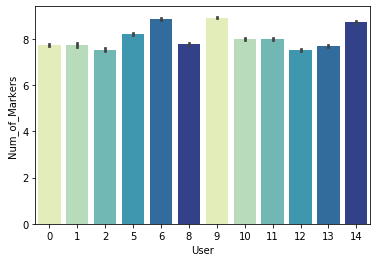

User
0     7.731379
1     7.740858
2     7.539246
5     8.215279
6     8.861321
8     7.787531
9     8.925000
10    8.002350
11    7.978488
12    7.522370
13    7.683662
14    8.730493
Name: Num_of_Markers, dtype: float64

In [229]:
# User wise Number of Markers
sns.barplot(x='User0',y='Number of Markers',data=data,palette=sns.color_palette("YlGnBu"))
plt.show()
data.groupby('User').Num_of_Markers.mean()

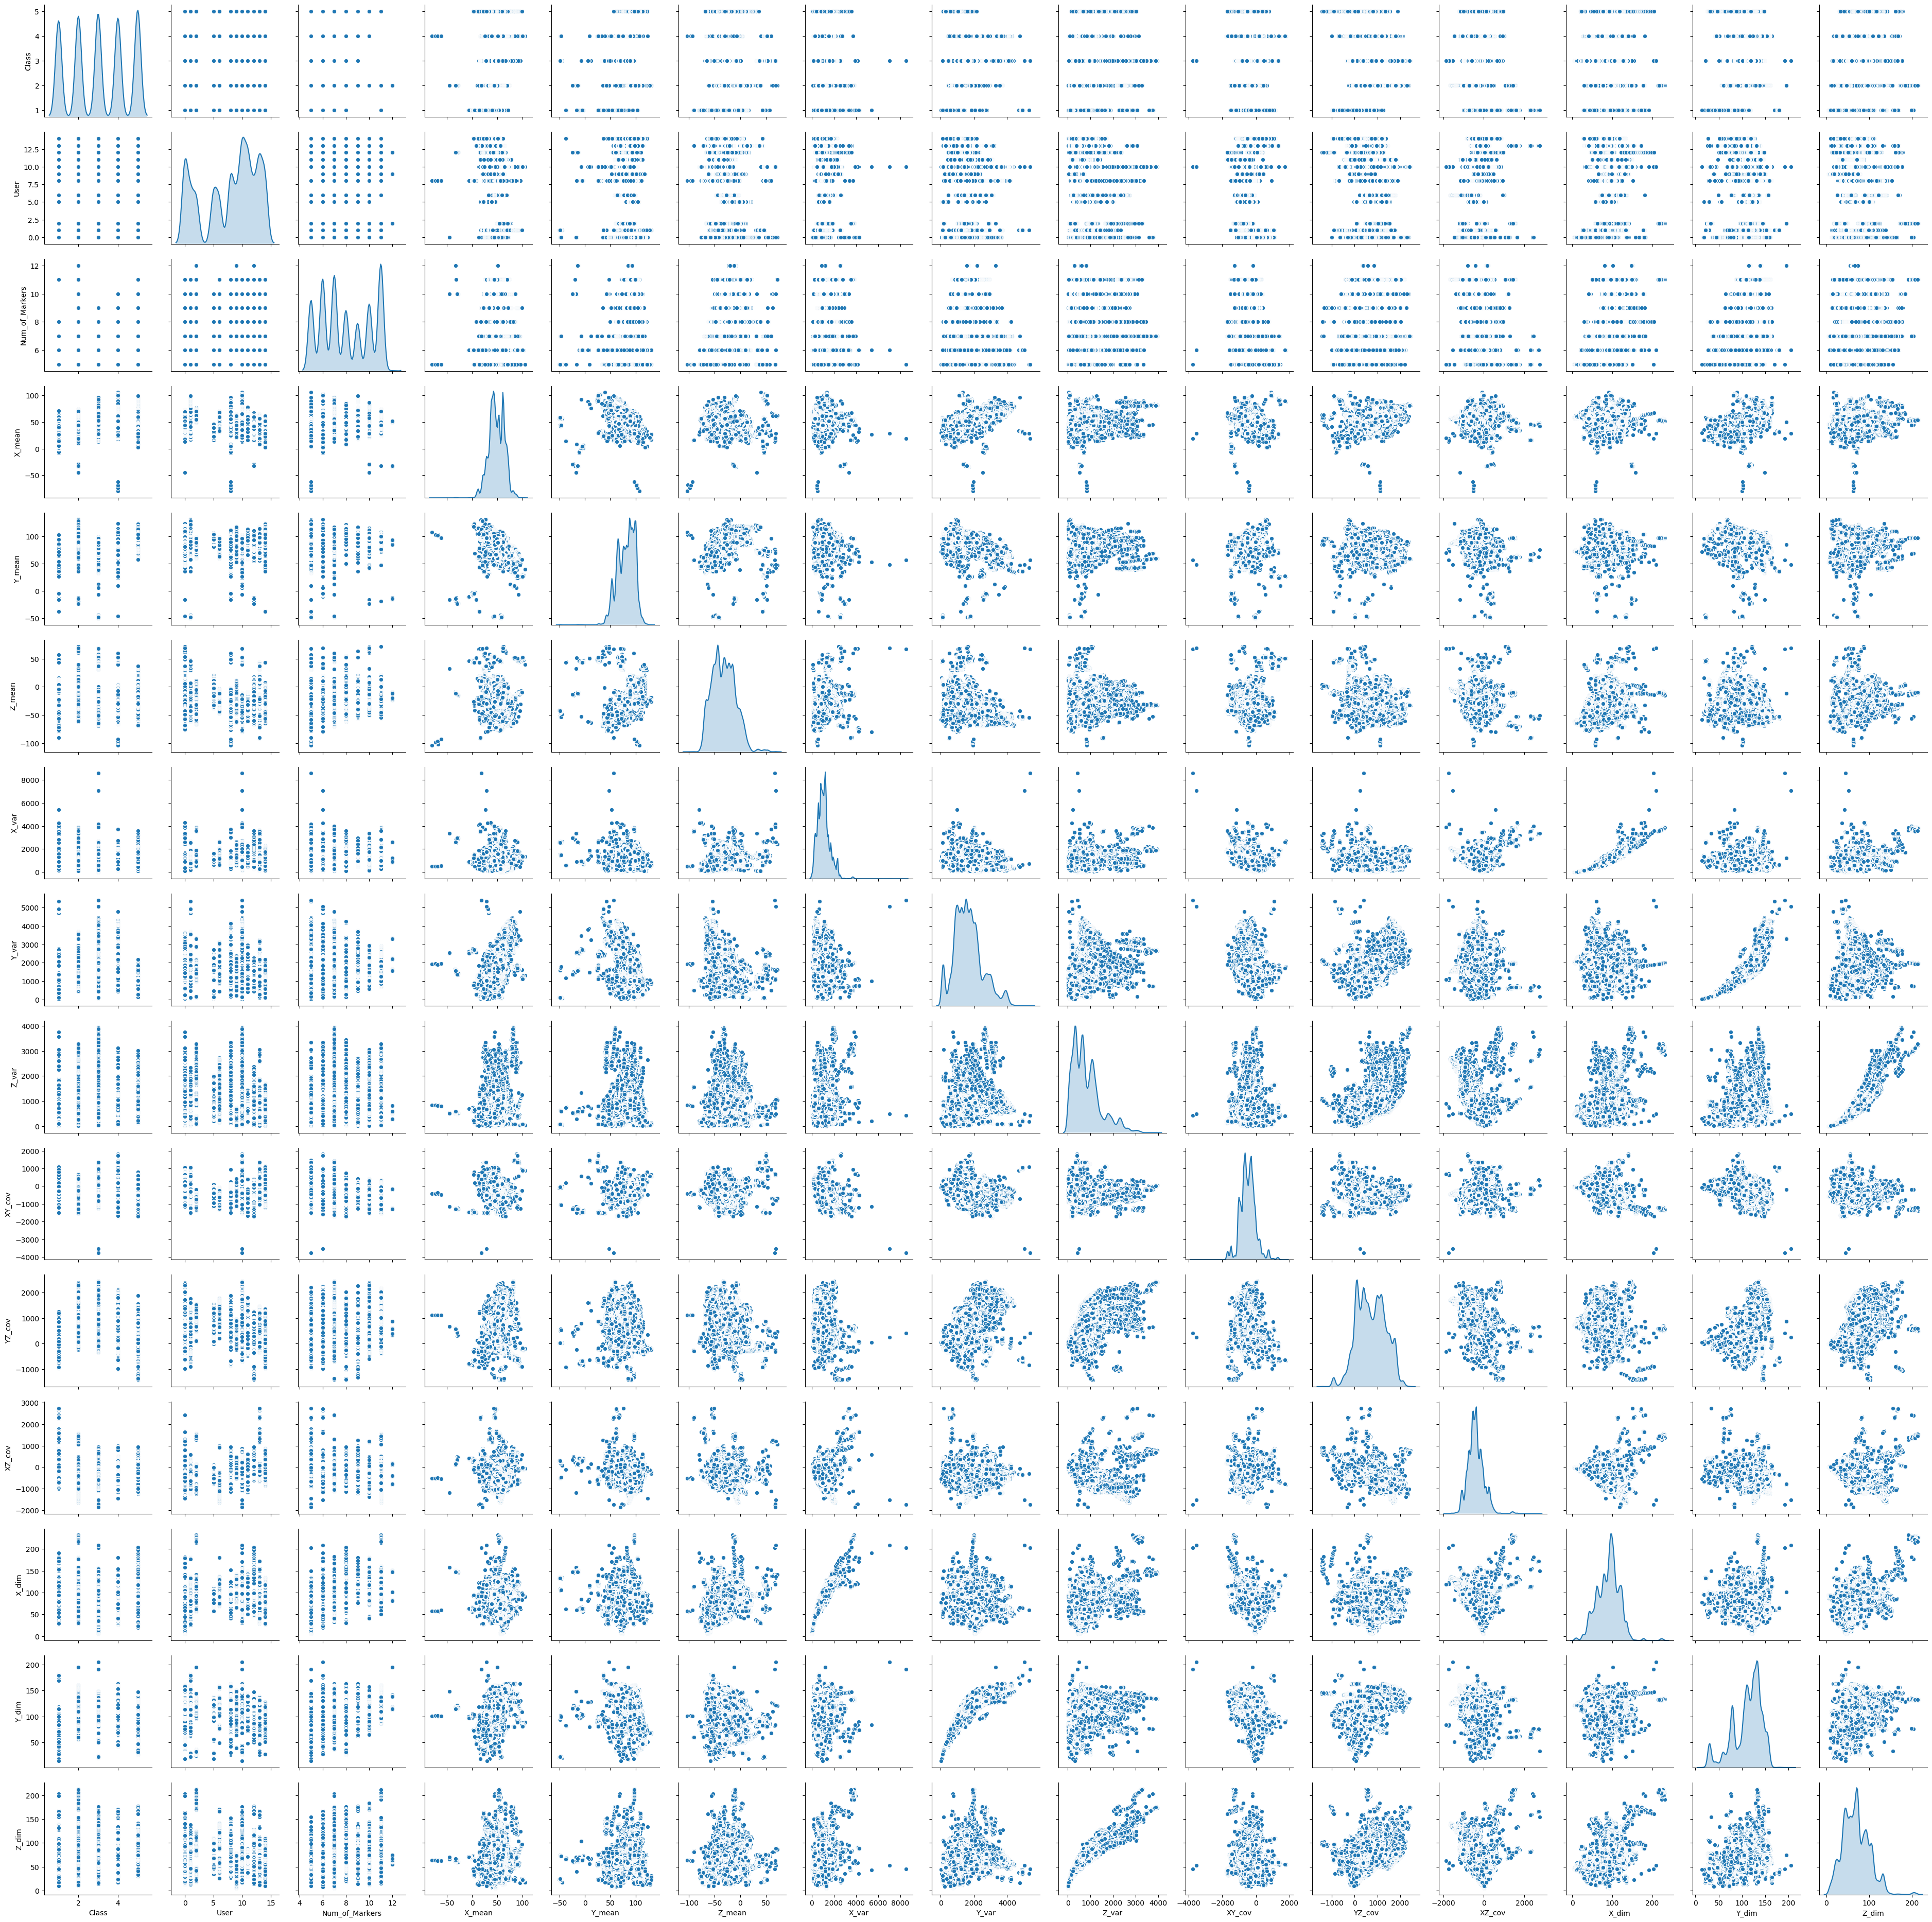

In [275]:
sns.pairplot(data,diag_kind='kde')
plt.show()

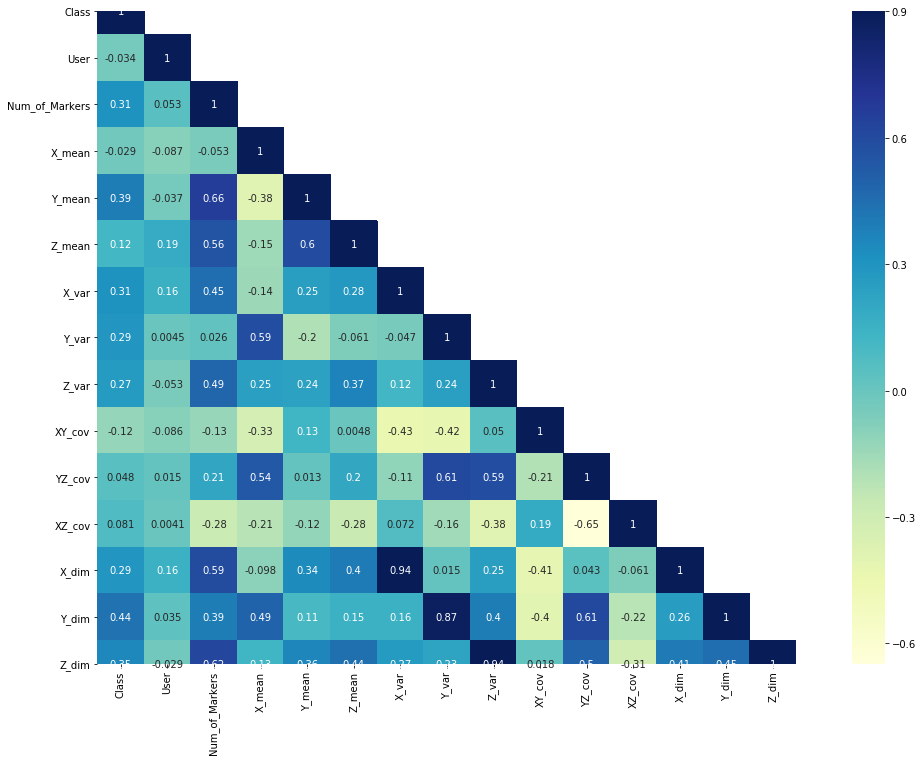

In [268]:
corr = data.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,12)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")
plt.show()

Inference:-

Highest Correlated feature is Y_dim and least correlated feature is XZ_cov.

There is multicollinearity in our data but we will live with it  and will use complex models.

### Statistical Tests

1. Multicollinearity

In [276]:
pd.Series([variance_inflation_factor(data.drop(columns=['Class','User']).values,i) for i in range(data.drop(columns=['Class','User']).shape[1])],index=data.drop(columns=['Class','User']).columns)

Num_of_Markers     70.778071
X_mean             18.770399
Y_mean             36.641875
Z_mean              3.799455
X_var              59.883245
Y_var              53.565763
Z_var              39.957027
XY_cov              4.649571
YZ_cov             11.437821
XZ_cov              4.830796
X_dim             151.971671
Y_dim             160.546312
Z_dim             100.604302
dtype: float64

2. Normality

In [286]:
pd.Series(['Normal' if(st.anderson(data[i])[0]<st.anderson(data[i])[1][2]) else 'Not Normal' for i in data.drop(columns=['Class','User']).columns],index=data.drop(columns=['Class','User']).columns)

Num_of_Markers    Not Normal
X_mean            Not Normal
Y_mean            Not Normal
Z_mean            Not Normal
X_var             Not Normal
Y_var             Not Normal
Z_var             Not Normal
XY_cov            Not Normal
YZ_cov            Not Normal
XZ_cov            Not Normal
X_dim             Not Normal
Y_dim             Not Normal
Z_dim             Not Normal
dtype: object

All features are not normal

3. Significance Test

In [294]:
pd.Series(['Significant Feature' if(st.kruskal(data[data.Class==1][i],data[data.Class==2][i],data[data.Class==3][i],data[data.Class==4][i],data[data.Class==5][i])[1]<0.05) else 'Not Significant' for i in data.drop(columns=['Class','User']).columns],index=data.drop(columns=['Class','User']).columns)

Num_of_Markers    Significant Feature
X_mean            Significant Feature
Y_mean            Significant Feature
Z_mean            Significant Feature
X_var             Significant Feature
Y_var             Significant Feature
Z_var             Significant Feature
XY_cov            Significant Feature
YZ_cov            Significant Feature
XZ_cov            Significant Feature
X_dim             Significant Feature
Y_dim             Significant Feature
Z_dim             Significant Feature
dtype: object

All features are significant.

## Base Model Results on Aggregate feature Dataset Using One_User_Out Metric

In [15]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
dt=DecisionTreeClassifier(random_state=42)
lr=LogisticRegression(solver='saga',random_state=42)
nb=GaussianNB()
knn=KNeighborsClassifier(n_jobs=-1)
adaboost=AdaBoostClassifier(random_state=42)
svc=SVC(random_state=42)

In [147]:
print('Logistic Regression')
train_score,test_score=One_User_Out(data,lr)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Logistic Regression

Train Score 0.9783238704106574 Train var 6.0292283639883455e-06

Test Score 0.8237541004597793 Test var 0.013189792353261882


In [148]:
print('Decision Tree')
train_score,test_score=One_User_Out(data,dt)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Decision Tree

Train Score 1.0 Train var 0.0

Test Score 0.686005970046411 Test var 0.0526222123134003


In [149]:
print('Random Forest')
train_score,test_score=One_User_Out(data,rf)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Random Forest

Train Score 1.0 Train var 0.0

Test Score 0.8480249820280014 Test var 0.012644579716633231


In [150]:
print('Naive Bayes')
train_score,test_score=One_User_Out(data,nb)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Naive Bayes

Train Score 0.8740536558706876 Train var 0.00030971617396682275

Test Score 0.7264840902476665 Test var 0.026472208615150313


In [151]:
print('KNN')
train_score,test_score=One_User_Out(data,knn)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

KNN

Train Score 0.9997798168460678 Train var 1.3581135234551437e-09

Test Score 0.7520321143108295 Test var 0.022537701216344193


In [152]:
print('AdaBoost')
train_score,test_score=One_User_Out(data,adaboost)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

AdaBoost

Train Score 0.7457252121933647 Train var 0.0016050546959630152

Test Score 0.5512856991951871 Test var 0.02896494703480731


In [153]:
print('SVC')
train_score,test_score=One_User_Out(data,svc)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

SVC

Train Score 0.9984800868857215 Train var 2.1308977303458796e-07

Test Score 0.882681831705436 Test var 0.01390263882890404


In [321]:
models=[]
models.append(('Logistic Regression',lr))
models.append(('Decision Tree',dt))
models.append(('Random Forest',rf))
models.append(('KNN',knn))
models.append(('Naive Bayes',nb))
models.append(('SVC',svc))
models.append(('Adaboost',adaboost))

In [322]:
train_score=[]
train_var=[]
test_score=[]
test_var=[]
train_bias=[]
test_bias=[]
name_list=[]
for name,model in models:
    train,test=One_User_Out(data,model)
    train_score.append(np.mean(train))
    test_score.append(np.mean(test))
    train_var.append(np.var(train,ddof=1))
    test_var.append(np.var(test,ddof=1))
    train_bias.append(np.mean(1-np.array(train)))
    test_bias.append(np.mean(1-np.array(test)))
    name_list.append(name)
score=pd.DataFrame({'Model_name':name_list,'Train_score':train_score,'Test_score':test_score,'Train_var':train_var,'Test_var':test_var,'Train_bias':train_bias,'Test_bias':test_bias})
score

Model_name  Train_score  Test_score     Train_var  Test_var  \
0  Logistic Regression     0.977837    0.828272  5.354606e-06  0.014873   
1        Decision Tree     1.000000    0.686006  0.000000e+00  0.052622   
2        Random Forest     1.000000    0.848025  0.000000e+00  0.012645   
3                  KNN     0.999780    0.752032  1.358114e-09  0.022538   
4          Naive Bayes     0.874054    0.726484  3.097162e-04  0.026472   
5                  SVC     0.996816    0.889212  2.688488e-07  0.011018   
6             Adaboost     0.745725    0.551286  1.605055e-03  0.028965   

   Train_bias  Test_bias  
0    0.022163   0.171728  
1    0.000000   0.313994  
2    0.000000   0.151975  
3    0.000220   0.247968  
4    0.125946   0.273516  
5    0.003184   0.110788  
6    0.254275   0.448714

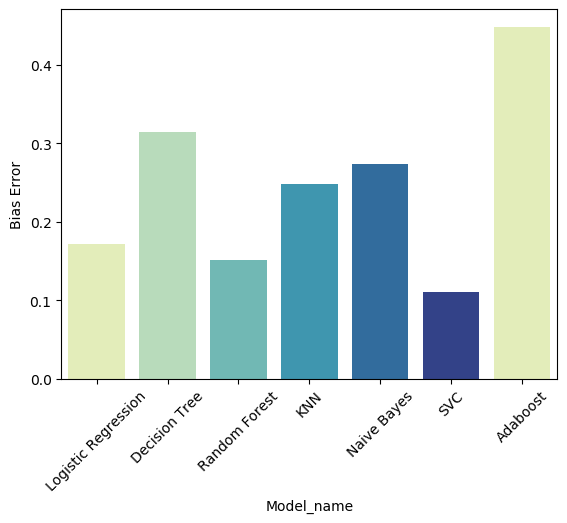

In [323]:
sns.barplot(x='Model_name',y='Test_bias',data=score,palette=sns.color_palette('YlGnBu'))
plt.xticks(rotation=45)
plt.ylabel('Bias Error')
plt.show()

Min is better : With Default Parameters SVC, RF and LR are working best as compared to others. 

In [304]:
svc1=SVC(C=10,gamma=0.1,kernel='rbf')
print('SVC')
train_score,test_score=One_User_Out(data,svc1)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

SVC

Train Score 0.9996329371562277 Train var 1.476414596539933e-08

Test Score 0.8273724893035944 Test var 0.023208933613261738


### RF feature importance

In [305]:
rf.fit(data.drop(columns=['User','Class']),data.Class)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [306]:
pd.Series(rf.feature_importances_,index=data.drop(columns=['User','Class']).columns)

Num_of_Markers    0.170247
X_mean            0.031321
Y_mean            0.121401
Z_mean            0.079706
X_var             0.042075
Y_var             0.108769
Z_var             0.051572
XY_cov            0.040777
YZ_cov            0.086990
XZ_cov            0.035178
X_dim             0.042352
Y_dim             0.128239
Z_dim             0.061374
dtype: float64

According to RF feature importance Number of Markers is most important feature.

## Tuning 

In [66]:
params=[]
f1_avg=[]
f1_var=[]
for i in ['gini','entropy']:
    for j in range(2,20,2):
        for k in range(2,50,5):
            lst=[]
            dt=DecisionTreeClassifier(criterion=i,max_depth=j,min_samples_split=k,random_state=42)
            train_score,test_score=One_User_Out(data,dt)
            params.append((i,j,k))
            f1_avg.append(np.mean(test_score))
            f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])    

Max F1 score:
                    F1_score  Variance_error
(entropy, 10, 17)  0.767919        0.010628


Min Variance Score:
                    F1_score  Variance_error
(entropy, 10, 17)  0.767919        0.010628


In [67]:
params=[]
f1_avg=[]
f1_var=[]
for i in ['gini','entropy']:
    for j in range(2,150,5):
        rf=RandomForestClassifier(n_estimators=j,criterion=i,n_jobs=-1,random_state=42)
        train_score,test_score=One_User_Out(data,rf)
        params.append((i,j))
        f1_avg.append(np.mean(test_score))
        f1_var.append(np.var(test_score,ddof=1))

            

result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Error:\n',result[result.Variance_error==result.Variance_error.min()])  

Max F1 score:
                 F1_score  Variance_error
(entropy, 107)  0.857535        0.011134


Min Variance Error:
                F1_score  Variance_error
(entropy, 57)  0.851803        0.008171


In [95]:
params=[]
f1_avg=[]
f1_var=[]

for i in [103,104,105,106,108,109,110,111,53,54,55,56,58,59,60]:
    rf=RandomForestClassifier(n_estimators=j,criterion='entropy',n_jobs=-1,random_state=42)
    train_score,test_score=One_User_Out(data,rf)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            

result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Error:\n',result[result.Variance_error==result.Variance_error.min()])  

Max F1 score:
      F1_score  Variance_error
105  0.856711        0.009976


Min Variance Error:
     F1_score  Variance_error
54  0.850236        0.007786


In [25]:
params=[]
test_f1=[]
f1_var=[]
train_f1=[]
for j in range(2,20,2):
    for k in range(2,50,5):
        lst=[]
        rf=RandomForestClassifier(n_estimators=54,criterion='entropy',max_depth=j,min_samples_split=k,n_jobs=-1,random_state=42)
        train_score,test_score=One_User_Out(data,rf)
        params.append((j,k))
        train_f1.append(np.mean(train_score))
        test_f1.append(np.mean(test_score))
        f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'Train_F1':train_f1,'Test_F1':test_f1,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.Test_F1==result.Test_F1.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])

Max F1 score:
          Train_F1   Test_F1  Variance_error
(18, 7)  0.999988  0.865943        0.013393


Min Variance Score:
          Train_F1   Test_F1  Variance_error
(18, 2)       1.0  0.850642        0.007701


In [26]:
result[abs(result.Train_F1-result.Test_F1)==min(abs(result.Train_F1-result.Test_F1))]

Train_F1   Test_F1  Variance_error
(2, 2)   0.766613  0.635257        0.018105
(2, 7)   0.766613  0.635257        0.018105
(2, 12)  0.766613  0.635257        0.018105
(2, 17)  0.766613  0.635257        0.018105
(2, 22)  0.766613  0.635257        0.018105
(2, 27)  0.766613  0.635257        0.018105
(2, 32)  0.766613  0.635257        0.018105
(2, 37)  0.766613  0.635257        0.018105
(2, 42)  0.766613  0.635257        0.018105
(2, 47)  0.766613  0.635257        0.018105

In [99]:
rf=RandomForestClassifier(criterion='entropy',n_estimators=105,n_jobs=-1,random_state=42)
train_score,test_score=One_User_Out(data,rf)

In [97]:
np.mean(train_score)

1.0

In [78]:
params=[]
f1_avg=[]
f1_var=[]
for i in range(2,150,5):
    rf=RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=10,min_samples_split=17,n_jobs=-1,random_state=42)
    train_score,test_score=One_User_Out(data,rf)
    params.append((i))
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            

result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Error:\n',result[result.Variance_error==result.Variance_error.min()])

Max F1 score:
     F1_score  Variance_error
42  0.869434        0.014434


Min Variance Error:
    F1_score  Variance_error
7  0.802719        0.013094


In [307]:
params=[]
f1_avg=[]
f1_var=[]
for i in range(2,30):
    for j in ['uniform','distance']:
        lst=[]
        knn=KNeighborsClassifier(n_neighbors=i,weights=j,n_jobs=-1)
        train_score,test_score=One_User_Out(data,knn)
        params.append((i,j))
        f1_avg.append(np.mean(test_score))
        f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])

Max F1 score:
                F1_score  Variance_error
(27, uniform)  0.809269          0.0153


Min Variance Score:
                F1_score  Variance_error
(27, uniform)  0.809269          0.0153


In [311]:
params=[]
f1_avg=[]
f1_var=[]
for i in [0.1,1,10,100,1000]:
    lr=LogisticRegression(solver='saga',random_state=42,C=i)
    train_score,test_score=One_User_Out(data,lr)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])

Max F1 score:
      F1_score  Variance_error
0.1  0.826384        0.015334


Min Variance Score:
         F1_score  Variance_error
1000.0  0.823899        0.012507


In [314]:
params=[]
f1_avg=[]
f1_var=[]
for i in [0.1,0.2,0.5,1]:
    lr=LogisticRegression(solver='saga',random_state=42,C=i)
    train_score,test_score=One_User_Out(data,lr)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])
result

Max F1 score:
      F1_score  Variance_error
0.2  0.828272        0.014873


Min Variance Score:
      F1_score  Variance_error
1.0  0.823754         0.01319


F1_score  Variance_error
0.1  0.826384        0.015334
0.2  0.828272        0.014873
0.5  0.825645        0.013628
1.0  0.823754        0.013190

In [315]:
lr=LogisticRegression(solver='saga',random_state=42,C=0.2)
dt=DecisionTreeClassifier(random_state=42)
dt_tuned=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=17,random_state=42)
rf=RandomForestClassifier(n_jobs=-1,random_state=42)
rf_min_bias=RandomForestClassifier(n_estimators=42,criterion='entropy',max_depth=10,min_samples_split=17,n_jobs=-1,random_state=42)
rf_min_var=RandomForestClassifier(n_estimators=54,criterion='entropy',max_depth=18,min_samples_split=2,n_jobs=-1,random_state=42)
nb=GaussianNB()
knn=KNeighborsClassifier(n_jobs=-1)
knn_tuned=KNeighborsClassifier(n_neighbors=27,weights='uniform',n_jobs=-1)

In [316]:
models=[]
models.append(('LR',lr))


models.append(('Base DT',dt))
models.append(('Tuned DT',dt_tuned))

models.append(('Base RF',rf))
models.append(('Min Bias RF',rf_min_bias))
models.append(('Min Var RF',rf_min_var))


models.append(('NB',nb))

models.append(('Base KNN',knn))
models.append(('Tuned KNN',knn_tuned))


In [317]:
train_score=[]
train_var=[]
test_score=[]
test_var=[]
train_bias=[]
test_bias=[]
name_list=[]
for name,model in models:
    train,test=One_User_Out(data,model)
    train_score.append(np.mean(train))
    test_score.append(np.mean(test))
    train_var.append(np.var(train,ddof=1))
    test_var.append(np.var(test,ddof=1))
    train_bias.append(np.mean(1-np.array(train)))
    test_bias.append(np.mean(1-np.array(test)))
    name_list.append(name)
score=pd.DataFrame({'Model_name':name_list,'Train_score':train_score,'Test_score':test_score,'Train_var':train_var,'Test_var':test_var,'Train_bias':train_bias,'Test_bias':test_bias})
score

Model_name  Train_score  Test_score     Train_var  Test_var  Train_bias  \
0           LR     0.977837    0.828272  5.354606e-06  0.014873    0.022163   
1      Base DT     1.000000    0.686006  0.000000e+00  0.052622    0.000000   
2     Tuned DT     0.998750    0.767919  3.320622e-07  0.010628    0.001250   
3      Base RF     1.000000    0.848025  0.000000e+00  0.012645    0.000000   
4  Min Bias RF     0.999817    0.869434  3.535212e-09  0.014434    0.000183   
5   Min Var RF     1.000000    0.850642  0.000000e+00  0.007701    0.000000   
6           NB     0.874054    0.726484  3.097162e-04  0.026472    0.125946   
7     Base KNN     0.999780    0.752032  1.358114e-09  0.022538    0.000220   
8    Tuned KNN     0.998506    0.809269  3.351937e-08  0.015300    0.001494   

   Test_bias  
0   0.171728  
1   0.313994  
2   0.232081  
3   0.151975  
4   0.130566  
5   0.149358  
6   0.273516  
7   0.247968  
8   0.190731

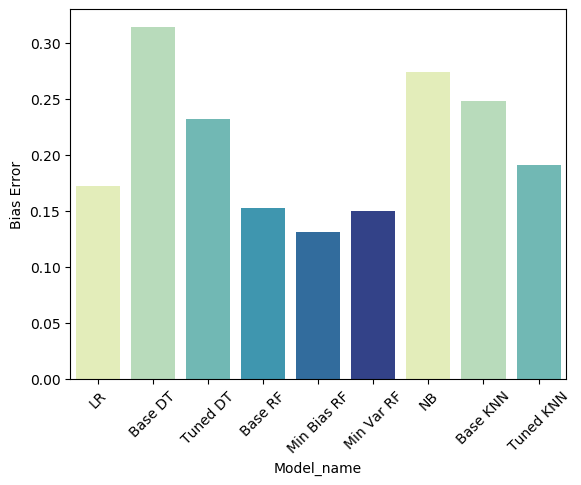

In [320]:
sns.barplot(x='Model_name',y='Test_bias',data=score,palette=sns.color_palette('YlGnBu'))
plt.xticks(rotation=45)
plt.ylabel('Bias Error')
plt.show()

## Boosting

In [79]:
params=[]
f1_avg=[]
f1_var=[]
for i in range(2,100,3):
    lst=[]
    adaboost=AdaBoostClassifier(n_estimators=i,random_state=42)
    train_score,test_score=One_User_Out(data,adaboost)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])

Max F1 score:
     F1_score  Variance_error
29  0.606182        0.047031


Min Variance Score:
    F1_score  Variance_error
2  0.459483        0.008256


In [324]:
lr=LogisticRegression(solver='saga',random_state=42,C=0.2)
params=[]
f1_avg=[]
f1_var=[]
for i in range(1,100,5):
    lst=[]
    adaboost=AdaBoostClassifier(base_estimator=lr,n_estimators=i,random_state=42)
    train_score,test_score=One_User_Out(data,adaboost)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])

Max F1 score:
     F1_score  Variance_error
16   0.73209        0.026775


Min Variance Score:
     F1_score  Variance_error
31  0.722317        0.018018


In [14]:
lr=LogisticRegression(solver='saga',random_state=42,C=0.2)
params=[]
f1_avg=[]
f1_var=[]
for i in range(100,200,5):
    lst=[]
    adaboost=AdaBoostClassifier(base_estimator=lr,n_estimators=i,random_state=42)
    train_score,test_score=One_User_Out(data,adaboost)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])

Max F1 score:
      F1_score  Variance_error
100   0.69557        0.042585


Min Variance Score:
      F1_score  Variance_error
100   0.69557        0.042585


In [325]:
nb=GaussianNB()
params=[]
f1_avg=[]
f1_var=[]
for i in range(2,100,5):
    lst=[]
    adaboost=AdaBoostClassifier(base_estimator=nb,n_estimators=i,random_state=42)
    train_score,test_score=One_User_Out(data,adaboost)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result_nb=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result_nb[result_nb.F1_score==result_nb.F1_score.max()])
print('\n\nMin Variance Score:\n',result_nb[result_nb.Variance_error==result_nb.Variance_error.min()])

Max F1 score:
     F1_score  Variance_error
77  0.697641        0.036653


Min Variance Score:
    F1_score  Variance_error
2  0.139586        0.011808


In [15]:
nb=GaussianNB()
params=[]
f1_avg=[]
f1_var=[]
for i in range(100,200,5):
    lst=[]
    adaboost=AdaBoostClassifier(base_estimator=nb,n_estimators=i,random_state=42)
    train_score,test_score=One_User_Out(data,adaboost)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])

Max F1 score:
      F1_score  Variance_error
170  0.722364        0.029393


Min Variance Score:
      F1_score  Variance_error
190  0.678253        0.014464


In [82]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=17,random_state=42)
params=[]
f1_avg=[]
f1_var=[]
for i in range(2,100,3):
    lst=[]
    adaboost=AdaBoostClassifier(base_estimator=dt,n_estimators=i,random_state=42)
    train_score,test_score=One_User_Out(data,adaboost)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])

Max F1 score:
     F1_score  Variance_error
98  0.835197        0.017977


Min Variance Score:
    F1_score  Variance_error
5  0.746233        0.009423


In [16]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=17,random_state=42)
params=[]
f1_avg=[]
f1_var=[]
for i in range(100,200,5):
    lst=[]
    adaboost=AdaBoostClassifier(base_estimator=dt,n_estimators=i,random_state=42)
    train_score,test_score=One_User_Out(data,adaboost)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])

Max F1 score:
      F1_score  Variance_error
105  0.834484        0.017956


Min Variance Score:
      F1_score  Variance_error
105  0.834484        0.017956


In [20]:
dt=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=17,random_state=42)
params=[]
f1_avg=[]
f1_var=[]
for i in [95,96,97,99,101,102,103,104]:
    lst=[]
    adaboost=AdaBoostClassifier(base_estimator=dt,n_estimators=i,random_state=42)
    train_score,test_score=One_User_Out(data,adaboost)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])

Max F1 score:
     F1_score  Variance_error
96  0.835183        0.018766


Min Variance Score:
     F1_score  Variance_error
95  0.834303        0.017813


In [83]:
rf=RandomForestClassifier(n_estimators=42,criterion='entropy',max_depth=10,min_samples_split=17,n_jobs=-1,random_state=42)
params=[]
f1_avg=[]
f1_var=[]
for i in range(2,100,3):
    lst=[]
    adaboost=AdaBoostClassifier(base_estimator=rf,n_estimators=i,random_state=42)
    train_score,test_score=One_User_Out(data,adaboost)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])

Max F1 score:
    F1_score  Variance_error
2  0.820587        0.018674


Min Variance Score:
    F1_score  Variance_error
2  0.820587        0.018674


In [17]:
rf=RandomForestClassifier(n_estimators=42,criterion='entropy',max_depth=10,min_samples_split=17,n_jobs=-1,random_state=42)
params=[]
f1_avg=[]
f1_var=[]
for i in range(100,200,5):
    lst=[]
    adaboost=AdaBoostClassifier(base_estimator=rf,n_estimators=i,random_state=42)
    train_score,test_score=One_User_Out(data,adaboost)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])

Max F1 score:
      F1_score  Variance_error
115   0.49556        0.084932


Min Variance Score:
      F1_score  Variance_error
140  0.114103        0.006838


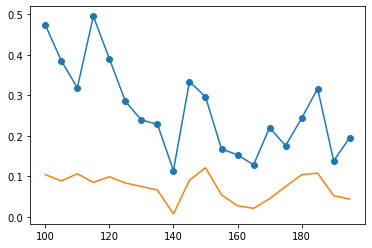

In [19]:
import matplotlib.pyplot as plt
plt.plot(params,f1_avg,marker='o')
plt.plot(params,f1_var)

In [92]:
rf=RandomForestClassifier(n_estimators=42,criterion='entropy',max_depth=10,min_samples_split=17,n_jobs=-1,random_state=42)
params=[]
f1_avg=[]
f1_var=[]
for i in range(1,100):
    lst=[]
    adaboost=AdaBoostClassifier(base_estimator=rf,n_estimators=i,random_state=42)
    train_score,test_score=One_User_Out(data,adaboost)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])

Max F1 score:
    F1_score  Variance_error
1  0.838051        0.011478


Min Variance Score:
    F1_score  Variance_error
1  0.838051        0.011478


In [20]:
lr=LogisticRegression(solver='saga',random_state=42,C=0.2)
rf=RandomForestClassifier(n_estimators=42,criterion='entropy',max_depth=10,min_samples_split=17,n_jobs=-1,random_state=42)
dt_tuned=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=17,random_state=42)
nb=GaussianNB()

adaboost=AdaBoostClassifier(n_estimators=29,random_state=42)
boosted_lr=AdaBoostClassifier(base_estimator=lr,n_estimators=16,random_state=42)
boosted_dt=AdaBoostClassifier(base_estimator=dt_tuned,n_estimators=98,random_state=42)
boosted_nb=AdaBoostClassifier(base_estimator=nb,n_estimators=170,random_state=42)
boosted_rf=AdaBoostClassifier(base_estimator=rf,n_estimators=1,random_state=42)

In [21]:
models=[]
#models.append(('LR',lr))
models.append(('Boosted LR',boosted_lr))

#models.append(('Base DT',dt))
#models.append(('Tuned DT',dt_tuned))
models.append(('Boosted DT',boosted_dt))

#models.append(('Base RF',rf))
#models.append(('Min Bias RF',rf_min_bias))
#models.append(('Min Var RF',rf_min_var))


#models.append(('NB',nb))
models.append(('Boosted NB',boosted_nb))

#models.append(('Base KNN',knn))
#models.append(('Tuned KNN',knn_tuned))
models.append(('AdaBoost',adaboost))
models.append(('Boosted RF',boosted_rf))



In [22]:
train_score=[]
train_var=[]
test_score=[]
test_var=[]
train_bias=[]
test_bias=[]
name_list=[]
for name,model in models:
    train,test=One_User_Out(data,model)
    train_score.append(np.mean(train))
    test_score.append(np.mean(test))
    train_var.append(np.var(train,ddof=1))
    test_var.append(np.var(test,ddof=1))
    train_bias.append(np.mean(1-np.array(train)))
    test_bias.append(np.mean(1-np.array(test)))
    name_list.append(name)
Boosted_score=pd.DataFrame({'Model_name':name_list,'Train_score':train_score,'Test_score':test_score,'Train_var':train_var,'Test_var':test_var,'Train_bias':train_bias,'Test_bias':test_bias})
Boosted_score   

Model_name  Train_score  Test_score     Train_var  Test_var  Train_bias  \
0  Boosted LR     0.840993    0.732090  2.861044e-04  0.026775    0.159007   
1  Boosted DT     1.000000    0.835197  0.000000e+00  0.017977    0.000000   
2  Boosted NB     0.898225    0.722364  1.309798e-03  0.029393    0.101775   
3    AdaBoost     0.745475    0.606182  2.111073e-03  0.047031    0.254525   
4  Boosted RF     0.999834    0.838051  3.889559e-09  0.011478    0.000166   

   Test_bias  
0   0.267910  
1   0.164803  
2   0.277636  
3   0.393818  
4   0.161949

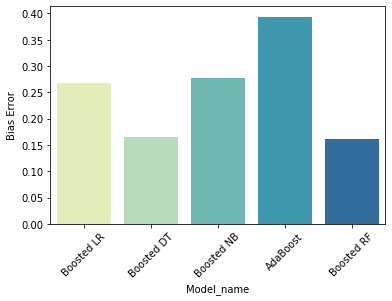

In [26]:
sns.barplot(x='Model_name',y='Test_bias',data=Boosted_score,palette=sns.color_palette('YlGnBu'))
plt.xticks(rotation=45)
plt.ylabel('Bias Error')
plt.show()

## Bagging 

Max F1 score:
    F1_score  Variance_error
1  0.778397        0.010823


Min Variance Score:
    F1_score  Variance_error
1  0.778397        0.010823


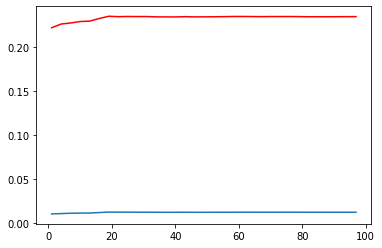

In [65]:
lr=LogisticRegression(random_state=42,solver='saga')
params=[]
f1_avg=[]
f1_var=[]
for i in range(1,100,3):
    lst=[]
    bag=BaggingClassifier(base_estimator=lr,n_estimators=i,n_jobs=-1,random_state=42)
    train_score,test_score=One_User_Out(data,bag)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])
plt.plot(params,1-np.array(f1_avg),color='r')
plt.plot(params,f1_var)
plt.show()

Max F1 score:
      F1_score  Variance_error
105  0.766048        0.012676


Min Variance Score:
      F1_score  Variance_error
105  0.766048        0.012676


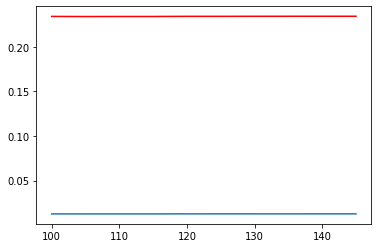

In [66]:
lr=LogisticRegression(random_state=42,solver='saga')
params=[]
f1_avg=[]
f1_var=[]
for i in range(100,150,5):
    lst=[]
    bag=BaggingClassifier(base_estimator=lr,n_estimators=i,n_jobs=-1,random_state=42)
    train_score,test_score=One_User_Out(data,bag)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])
plt.plot(params,1-np.array(f1_avg),color='r')
plt.plot(params,f1_var)
plt.show()

Max F1 score:
     F1_score  Variance_error
40  0.727081        0.026497


Min Variance Score:
     F1_score  Variance_error
88  0.726661        0.026456


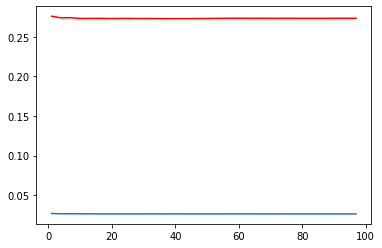

In [74]:
nb=GaussianNB()
params=[]
f1_avg=[]
f1_var=[]
for i in range(1,100,3):
    lst=[]
    bag=BaggingClassifier(base_estimator=nb,n_estimators=i,n_jobs=-1,random_state=42)
    train_score,test_score=One_User_Out(data,bag)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])
plt.plot(params,1-np.array(f1_avg),color='r')
plt.plot(params,f1_var)
plt.show()

Max F1 score:
    F1_score  Variance_error
4  0.757757        0.025301


Min Variance Score:
    F1_score  Variance_error
1  0.746957        0.013413


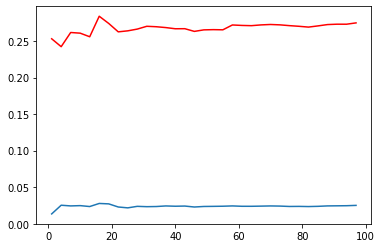

In [87]:
dt_tuned=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=17,random_state=42)
params=[]
f1_avg=[]
f1_var=[]
for i in range(1,100,3):
    lst=[]
    bag=BaggingClassifier(base_estimator=dt_tuned,n_estimators=i,n_jobs=-1,random_state=42)
    train_score,test_score=One_User_Out(data,bag)
    params.append(i)
    f1_avg.append(np.mean(test_score))
    f1_var.append(np.var(test_score,ddof=1))

            
result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])
plt.plot(params,1-np.array(f1_avg),color='r')
plt.plot(params,f1_var)
plt.show()

In [23]:
dt_tuned=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=17,random_state=42)
nb=GaussianNB()
lr=LogisticRegression(random_state=42,solver='saga')

bag_lr=BaggingClassifier(base_estimator=lr,n_estimators=1,n_jobs=-1,random_state=42)
bag_nb=BaggingClassifier(base_estimator=nb,n_estimators=88,n_jobs=-1,random_state=42)
bag_dt=BaggingClassifier(base_estimator=dt_tuned,n_estimators=1,n_jobs=-1,random_state=42)

In [24]:
models=[]
models.append(('Bagged LR',bag_lr))
models.append(('Bagged NB',bag_nb))
models.append(('Bagged DT',bag_dt))


In [25]:
train_score=[]
train_var=[]
test_score=[]
test_var=[]
train_bias=[]
test_bias=[]
name_list=[]
for name,model in models:
    train,test=One_User_Out(data,model)
    train_score.append(np.mean(train))
    test_score.append(np.mean(test))
    train_var.append(np.var(train,ddof=1))
    test_var.append(np.var(test,ddof=1))
    train_bias.append(np.mean(1-np.array(train)))
    test_bias.append(np.mean(1-np.array(test)))
    name_list.append(name)
Bagged_score=pd.DataFrame({'Model_name':name_list,'Train_score':train_score,'Test_score':test_score,'Train_var':train_var,'Test_var':test_var,'Train_bias':train_bias,'Test_bias':test_bias})
Bagged_score   

Model_name  Train_score  Test_score     Train_var  Test_var  Train_bias  \
0  Bagged LR     0.978071    0.824974  5.678289e-06  0.012413    0.021929   
1  Bagged NB     0.873987    0.726661  3.096516e-04  0.026456    0.126013   
2  Bagged DT     0.997618    0.746957  4.960129e-07  0.013413    0.002382   

   Test_bias  
0   0.175026  
1   0.273339  
2   0.253043

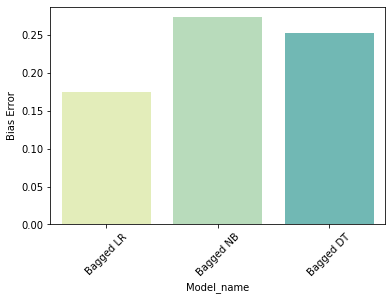

In [27]:
sns.barplot(x='Model_name',y='Test_bias',data=Bagged_score,palette=sns.color_palette('YlGnBu'))
plt.xticks(rotation=45)
plt.ylabel('Bias Error')
plt.show()

## SVM

Max F1 score:
                        F1_score  Variance_error
(poly, auto, 3, 0.1)   0.888815        0.010962
(poly, scale, 3, 0.1)  0.888815        0.010962


Min Variance Score:
                     F1_score  Variance_error
(rbf, 100, 1, 0.1)  0.068932        0.000347
(rbf, 100, 2, 0.1)  0.068932        0.000347


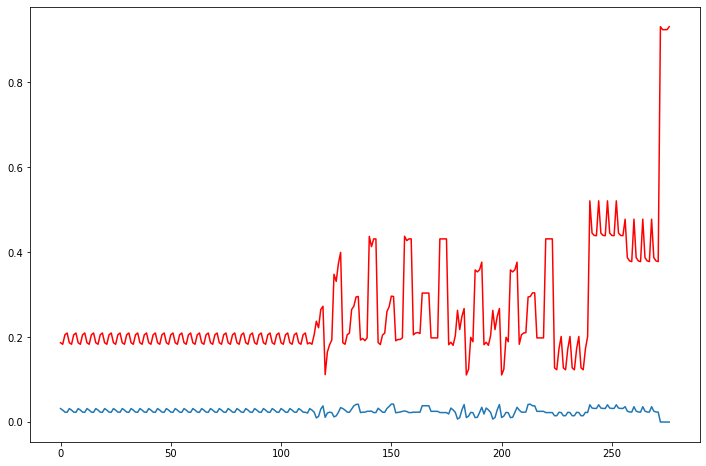

In [43]:
params=[]
f1_avg=[]
f1_var=[]
for i in ['linear', 'poly', 'rbf']:
    for j in {'scale','auto', 0.1,0.9,1,10,100}:
        for k in [1,2,3,4]:
            for l in [0.1,1,10,100]:
                svc=SVC(kernel=i,gamma=j,degree=k,C=l,random_state=42)
                train_score,test_score=One_User_Out(data,svc)
                params.append((i,j,k,l))
                f1_avg.append(np.mean(test_score))
                f1_var.append(np.var(test_score,ddof=1))
                

result=pd.DataFrame({'F1_score':f1_avg,'Variance_error':f1_var},index=params)
result
print('Max F1 score:\n',result[result.F1_score==result.F1_score.max()])
print('\n\nMin Variance Score:\n',result[result.Variance_error==result.Variance_error.min()])
plt.figure(figsize=(12,8))
plt.plot(range(len(params)),1-np.array(f1_avg),color='r')
plt.plot(range(len(params)),f1_var)
plt.show()

In [35]:
result[result.F1_score>0.86]

F1_score  Variance_error
(poly, 0.1, 3, 0.1)    0.888119        0.011436
(poly, auto, 3, 0.1)   0.888815        0.010962
(poly, auto, 3, 1)     0.875559        0.014277
(poly, scale, 3, 0.1)  0.888815        0.010962
(poly, scale, 3, 1)    0.875559        0.014277
(rbf, 0.1, 1, 0.1)     0.872101        0.015152
(rbf, 0.1, 1, 1)       0.876518        0.015252
(rbf, 0.1, 2, 0.1)     0.872101        0.015152
(rbf, 0.1, 2, 1)       0.876518        0.015252
(rbf, 0.1, 3, 0.1)     0.872101        0.015152
(rbf, 0.1, 3, 1)       0.876518        0.015252
(rbf, 0.1, 4, 0.1)     0.872101        0.015152
(rbf, 0.1, 4, 1)       0.876518        0.015252

In [41]:
result[result.Variance_error<0.01]

F1_score  Variance_error
(poly, auto, 2, 0.1)   0.736870        0.007357
(poly, scale, 2, 0.1)  0.736870        0.007357
(rbf, 100, 1, 0.1)     0.068932        0.000347
(rbf, 100, 1, 1)       0.075915        0.000377
(rbf, 100, 1, 10)      0.075915        0.000377
(rbf, 100, 1, 100)     0.075915        0.000377
(rbf, 100, 2, 0.1)     0.068932        0.000347

In [39]:
result

F1_score  Variance_error
(linear, 0.1, 1, 0.1)  0.812930        0.032030
(linear, 0.1, 1, 1)    0.816585        0.028436
(linear, 0.1, 1, 10)   0.794250        0.023693
(linear, 0.1, 1, 100)  0.790032        0.023328
(linear, 0.1, 2, 0.1)  0.812930        0.032030
...                         ...             ...
(rbf, 100, 1, 0.1)     0.068932        0.000347
(rbf, 100, 1, 1)       0.075915        0.000377
(rbf, 100, 1, 10)      0.075915        0.000377
(rbf, 100, 1, 100)     0.075915        0.000377
(rbf, 100, 2, 0.1)     0.068932        0.000347

[277 rows x 2 columns]

### Models with 80+ f1 score

In [45]:
lr=LogisticRegression(solver='saga',random_state=42,C=0.2)
rf_min_bias=RandomForestClassifier(n_estimators=42,criterion='entropy',max_depth=10,min_samples_split=17,n_jobs=-1,random_state=42)
rf_min_var=RandomForestClassifier(n_estimators=54,criterion='entropy',max_depth=18,min_samples_split=2,n_jobs=-1,random_state=42)
knn_tuned=KNeighborsClassifier(n_neighbors=27,weights='uniform',n_jobs=-1)
svc=SVC(kernel='poly',gamma='scale',degree=3,C=0.1)
bag_lr=BaggingClassifier(base_estimator=lr,n_estimators=1,n_jobs=-1,random_state=42)

dt_tuned=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=17,random_state=42)
boosted_dt=AdaBoostClassifier(base_estimator=dt_tuned,n_estimators=98,random_state=42)
boosted_rf=AdaBoostClassifier(base_estimator=rf_min_bias,n_estimators=1,random_state=42)


In [48]:
models=[]
models.append(('Logistic Regression',lr))
models.append(('RF min bias',rf_min_bias))
models.append(('RF min var',rf_min_var))
models.append(('KNN Tuned',knn_tuned))
models.append(('SVC',svc))
models.append(('Bagged LR',bag_lr))
models.append(('Boosted DT',boosted_dt))
models.append(('Boosted RF',boosted_rf))


In [49]:
train_score=[]
train_var=[]
test_score=[]
test_var=[]
train_bias=[]
test_bias=[]
name_list=[]
for name,model in models:
    train,test=One_User_Out(data,model)
    train_score.append(np.mean(train))
    test_score.append(np.mean(test))
    train_var.append(np.var(train,ddof=1))
    test_var.append(np.var(test,ddof=1))
    train_bias.append(np.mean(1-np.array(train)))
    test_bias.append(np.mean(1-np.array(test)))
    name_list.append(name)
Best_score=pd.DataFrame({'Model_name':name_list,'Train_score':train_score,'Test_score':test_score,'Train_var':train_var,'Test_var':test_var,'Train_bias':train_bias,'Test_bias':test_bias})
Best_score 

Model_name  Train_score  Test_score     Train_var  Test_var  \
0  Logistic Regression     0.977837    0.828272  5.354606e-06  0.014873   
1          RF min bias     0.999817    0.869434  3.535212e-09  0.014434   
2           RF min var     1.000000    0.850642  0.000000e+00  0.007701   
3            KNN Tuned     0.998506    0.809269  3.351937e-08  0.015300   
4                  SVC     0.996340    0.888815  3.352958e-07  0.010962   
5            Bagged LR     0.977585    0.828400  6.258044e-06  0.014681   
6           Boosted DT     1.000000    0.835197  0.000000e+00  0.017977   
7           Boosted RF     0.999834    0.838051  3.889559e-09  0.011478   

   Train_bias  Test_bias  
0    0.022163   0.171728  
1    0.000183   0.130566  
2    0.000000   0.149358  
3    0.001494   0.190731  
4    0.003660   0.111185  
5    0.022415   0.171600  
6    0.000000   0.164803  
7    0.000166   0.161949

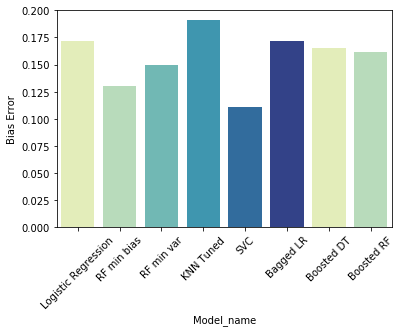

In [50]:
sns.barplot(x='Model_name',y='Test_bias',data=Best_score,palette=sns.color_palette('YlGnBu'))
plt.xticks(rotation=45)
plt.ylabel('Bias Error')
plt.show()

# Stratified

In [7]:
def stratied(data,model):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import f1_score
    train_score=[]
    test_score=[]
    for j in [0,21,42,63,101]:
        train=pd.DataFrame()
        test=pd.DataFrame()
        for i in data.Class.unique():
            tr=pd.DataFrame()
            ts=pd.DataFrame()
            tr,ts=train_test_split(data[data.Class==i],test_size=0.3,stratify=data[data.Class==i].User,random_state=j)
            train=train.append(tr)
            test=test.append(ts)
        X_train=train.drop(columns=['Class','User'])
        y_train=train.Class
        X_test=test.drop(columns=['Class','User'])
        y_test=test.Class
        model.fit(X_train,y_train)
        print(j,'Train_score',f1_score(y_train,model.predict(X_train),average='weighted'))
        print(j,'Test_score',f1_score(y_test,model.predict(X_test),average='weighted'))
        train_score.append(f1_score(y_train,model.predict(X_train),average='weighted'))
        test_score.append(f1_score(y_test,model.predict(X_test),average='weighted'))
    return(train_score,test_score)

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [10]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
dt=DecisionTreeClassifier(random_state=42)
lr=LogisticRegression(solver='liblinear',random_state=42)
nb=GaussianNB()
knn=KNeighborsClassifier()
svc=SVC()

In [11]:
print('Logistic Regression')
train_score,test_score=stratied(data,lr)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Logistic Regression
0 Train_score 0.9139438086662484
0 Test_score 0.9123144699754991
21 Train_score 0.9248670152043607
21 Test_score 0.9237990110004707
42 Train_score 0.9241867919706304
42 Test_score 0.9260584744362935
63 Train_score 0.9045956872865336
63 Test_score 0.9052349412869192
101 Train_score 0.9233423204704314
101 Test_score 0.9236082279118456

Train Score 0.9181871247196408 Train var 7.74814724666156e-05

Test Score 0.9182030249222055 Test var 8.12714097869747e-05


In [12]:
print('Decision Tree')
train_score,test_score=stratied(data,dt)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Decision Tree
0 Train_score 1.0
0 Test_score 0.9979793456458859
21 Train_score 1.0
21 Test_score 0.9977994973390334
42 Train_score 1.0
42 Test_score 0.9983385676164898
63 Train_score 1.0
63 Test_score 0.997619941102559
101 Train_score 1.0
101 Test_score 0.9978444548591944

Train Score 1.0 Train var 0.0

Test Score 0.9979163613126325 Test var 7.222946414090059e-08


In [13]:
print('Random Forest')
train_score,test_score=stratied(data,rf)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Random Forest
0 Train_score 1.0
0 Test_score 0.9998203623359811
21 Train_score 1.0
21 Test_score 0.9995060554233155
42 Train_score 1.0
42 Test_score 0.9998203776116037
63 Train_score 1.0
63 Test_score 0.9995509570765527
101 Train_score 1.0
101 Test_score 0.9996407545597663

Train Score 1.0 Train var 0.0

Test Score 0.9996677014014439 Test var 2.1775044499581262e-08


In [14]:
print('Naive Bayes')
train_score,test_score=stratied(data,nb)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Naive Bayes
0 Train_score 0.8687468064960705
0 Test_score 0.8681782135566211
21 Train_score 0.8685262435769552
21 Test_score 0.8683382957983306
42 Train_score 0.867568878277288
42 Test_score 0.8666247010739754
63 Train_score 0.8669368990747781
63 Test_score 0.8694985405132999
101 Train_score 0.868831425547028
101 Test_score 0.8663092218519202

Train Score 0.8681220505944239 Train var 6.918721160290058e-07

Test Score 0.8677897945588293 Test var 1.730268508348217e-06


In [15]:
print('KNN')
train_score,test_score=stratied(data,knn)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

KNN
0 Train_score 0.9988259112032092
0 Test_score 0.998607901699009
21 Train_score 0.9990760980660203
21 Test_score 0.9983833362918632
42 Train_score 0.9988836153374003
42 Test_score 0.9986078926010484
63 Train_score 0.9988836601263231
63 Test_score 0.997933953894456
101 Train_score 0.9988259311090913
101 Test_score 0.9982037301091734

Train Score 0.9988990431684088 Train var 1.0629187568309955e-08

Test Score 0.9983473629191101 Test var 8.214691507626728e-08


In [16]:
print('SVC')
train_score,test_score=stratied(data,svc)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

SVC
0 Train_score 0.9734828538878534
0 Test_score 0.9741719828745012
21 Train_score 0.9740966122323634
21 Test_score 0.9721877543751662
42 Train_score 0.9738043355998773
42 Test_score 0.9726810364095424
63 Train_score 0.974292524570586
63 Test_score 0.9708111418368353
101 Train_score 0.9735409918543644
101 Test_score 0.9729995201203361

Train Score 0.9738434636290091 Train var 1.2219987679176314e-07

Test Score 0.9725702871232762 Test var 1.500714772962443e-06


In [9]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
dt=DecisionTreeClassifier(random_state=42)
lr=LogisticRegression(solver='liblinear',random_state=42)
nb=GaussianNB()
knn=KNeighborsClassifier()
svc=SVC()

In [10]:
models=[]
models.append(('LR',lr))
models.append(('Decision Tree',dt))
models.append(('Random Forest',rf))
models.append(('Naive Bayes',nb))
models.append(('KNN',knn))
models.append(('SVC',svc))

In [12]:
train_score=[]
train_var=[]
test_score=[]
test_var=[]
train_bias=[]
test_bias=[]
name_list=[]
for name,model in models:
    train,test=stratied(data,model)
    train_score.append(np.mean(train))
    test_score.append(np.mean(test))
    train_var.append(np.var(train,ddof=1))
    test_var.append(np.var(test,ddof=1))
    train_bias.append(np.mean(1-np.array(train)))
    test_bias.append(np.mean(1-np.array(test)))
    name_list.append(name)
Stratified_score=pd.DataFrame({'Model_name':name_list,'Train_score':train_score,'Test_score':test_score,'Train_var':train_var,'Test_var':test_var,'Train_bias':train_bias,'Test_bias':test_bias})
Stratified_score

0 Train_score 0.9139438086662484
0 Test_score 0.9123144699754991
21 Train_score 0.9248670152043607
21 Test_score 0.9237990110004707
42 Train_score 0.9241867919706304
42 Test_score 0.9260584744362935
63 Train_score 0.9045956872865336
63 Test_score 0.9052349412869192
101 Train_score 0.9233423204704314
101 Test_score 0.9236082279118456
0 Train_score 1.0
0 Test_score 0.9979793456458859
21 Train_score 1.0
21 Test_score 0.9977994973390334
42 Train_score 1.0
42 Test_score 0.9983385676164898
63 Train_score 1.0
63 Test_score 0.997619941102559
101 Train_score 1.0
101 Test_score 0.9978444548591944
0 Train_score 1.0
0 Test_score 0.9998203623359811
21 Train_score 1.0
21 Test_score 0.9995060554233155
42 Train_score 1.0
42 Test_score 0.9998203776116037
63 Train_score 1.0
63 Test_score 0.9995509570765527
101 Train_score 1.0
101 Test_score 0.9996407545597663
0 Train_score 0.8687468064960705
0 Test_score 0.8681782135566211
21 Train_score 0.8685262435769552
21 Test_score 0.8683382957983306
42 Train_score

Model_name  Train_score  Test_score     Train_var      Test_var  \
0             LR     0.918187    0.918203  7.748147e-05  8.127141e-05   
1  Decision Tree     1.000000    0.997916  0.000000e+00  7.222946e-08   
2  Random Forest     1.000000    0.999668  0.000000e+00  2.177504e-08   
3    Naive Bayes     0.868122    0.867790  6.918721e-07  1.730269e-06   
4            KNN     0.998899    0.998347  1.062919e-08  8.214692e-08   
5            SVC     0.973843    0.972570  1.221999e-07  1.500715e-06   

   Train_bias  Test_bias  
0    0.081813   0.081797  
1    0.000000   0.002084  
2    0.000000   0.000332  
3    0.131878   0.132210  
4    0.001101   0.001653  
5    0.026157   0.027430

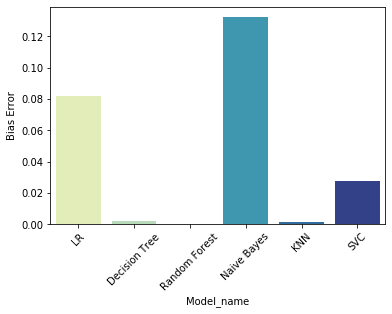

In [15]:
sns.barplot(x='Model_name',y='Test_bias',data=Stratified_score,palette=sns.color_palette('YlGnBu'))
plt.xticks(rotation=45)
plt.ylabel('Bias Error')
plt.show()

# Base Models on Aggregate Features using Three_User_Out Metric

In [34]:
def three_user_out_comb(model,data):
    from itertools import combinations
    from sklearn.metrics import f1_score
    import random  
    from sklearn.preprocessing import StandardScaler
    sc=StandardScaler()
    test_score=[]
    train_score=[]
    comb=combinations([0,1,2,5,6,8,9,10,11,12,13,14],3)
    lst=[]
    for i in comb:
        lst.append(list(i))
    np.random.shuffle(lst)
    l1=lst[:35]
    for i in l1:
        X_train=data[(data.User!=i[0])&(data.User!=i[1])&(data.User!=i[2])].drop(columns=['User','Class'])
        y_train=data[(data.User!=i[0])&(data.User!=i[1])&(data.User!=i[2])].Class
        X_test=data[(data.User==i[0])|(data.User==i[1])|(data.User==i[2])].drop(columns=['User','Class'])
        y_test=data[(data.User==i[0])|(data.User==i[1])|(data.User==i[2])].Class
        
        X_train_scaled=sc.fit_transform(X_train)
        X_test_scaled=sc.transform(X_test)
        model.fit(X_train_scaled,y_train)
        train_score.append(f1_score(y_train,model.predict(X_train_scaled),average='weighted'))
        test_score.append(f1_score(y_test,model.predict(X_test_scaled),average='weighted'))
    return(train_score,test_score)
    

In [35]:
comb_data=pd.read_csv('Aggregate.csv')
comb_data

Unnamed: 0  Class  User  num_of_markers     x_mean      y_mean  \
0               1      1     0             5.0  62.440317   54.807598   
1               2      1     0             5.0  64.785121   55.647991   
2               3      1     0             5.0  64.162415   55.873836   
3               4      1     0             5.0  63.439104   55.151830   
4               5      1     0             5.0  63.189702   54.832340   
...           ...    ...   ...             ...        ...         ...   
78090       78091      5    14            10.0  27.823671   97.288106   
78091       78092      5    14            10.0  28.021968   97.191781   
78092       78093      5    14            10.0  28.103645   96.953570   
78093       78094      5    14             9.0  22.648928  104.055383   
78094       78095      5    14            10.0  28.213441   96.944548   

          z_mean        x_var        y_var       z_var      xy_cov  \
0     -67.097888   368.120574   816.727481   74.897086 -142.510146   
1     -64.209132   364.625268   809.982596   78.885669 -144.142900   
2     -64.771039   369.632067   813.945768   74.420553 -152.368059   
3     -65.928355   377.415042   810.107918   66.130036 -161.489736   
4     -66.390470   381.445880   812.447612   63.733840 -159.889770   
...          ...          ...          ...         ...         ...   
78090 -29.054040  1727.153653  1006.367503  642.373689 -486.241170   
78091 -29.248339  1741.867109  1019.294730  653.265255 -501.893198   
78092 -29.735080  1742.707823  1031.029876  660.130214 -508.019483   
78093 -28.173737  1603.241194   583.280506  706.962956 -119.641403   
78094 -29.853671  1738.319774  1047.627475  664.939666 -514.416378   

           yz_cov      xz_cov       x_dim       y_dim      z_dim  
0      147.356460 -150.851339   48.611035   71.001621  20.764858  
1      155.512996 -152.345094   48.314895   70.758611  21.107482  
2      146.664366 -151.848714   48.846584   70.837907  20.532085  
3      128.851696 -148.939518   49.758767   70.618101  19.475677  
4      126.648243 -146.701673   50.192930   70.715764  19.098996  
...           ...         ...         ...         ...        ...  
78090  127.041925 -252.892755  118.015566  102.297380  73.225560  
78091  142.519922 -267.281781  118.511287  102.745087  73.200405  
78092  150.974173 -269.699417  118.516704  103.278165  73.739082  
78093   25.767551 -186.828560  118.550298   75.473138  74.036583  
78094  161.909273 -269.354192  118.378849  104.159822  74.134431  

[78095 rows x 16 columns]

In [36]:
comb_data.drop(comb_data[(comb_data.User==4)|(comb_data.User==7)].index,inplace=True)
data3=comb_data[comb_data.num_of_markers>4]
data3=data3.drop(columns=['Unnamed: 0'],axis=1)
data3.head()

Class  User  num_of_markers     x_mean     y_mean     z_mean       x_var  \
0      1     0             5.0  62.440317  54.807598 -67.097888  368.120574   
1      1     0             5.0  64.785121  55.647991 -64.209132  364.625268   
2      1     0             5.0  64.162415  55.873836 -64.771039  369.632067   
3      1     0             5.0  63.439104  55.151830 -65.928355  377.415042   
4      1     0             5.0  63.189702  54.832340 -66.390470  381.445880   

        y_var      z_var      xy_cov      yz_cov      xz_cov      x_dim  \
0  816.727481  74.897086 -142.510146  147.356460 -150.851339  48.611035   
1  809.982596  78.885669 -144.142900  155.512996 -152.345094  48.314895   
2  813.945768  74.420553 -152.368059  146.664366 -151.848714  48.846584   
3  810.107918  66.130036 -161.489736  128.851696 -148.939518  49.758767   
4  812.447612  63.733840 -159.889770  126.648243 -146.701673  50.192930   

       y_dim      z_dim  
0  71.001621  20.764858  
1  70.758611  21.107482  
2  70.837907  20.532085  
3  70.618101  19.475677  
4  70.715764  19.098996

In [11]:
rf=RandomForestClassifier(random_state=42,n_jobs=-1)
dt=DecisionTreeClassifier(random_state=42)
lr=LogisticRegression(random_state=42,n_jobs=-1)
nb=GaussianNB()
knn=KNeighborsClassifier(n_jobs=-1)
svc=SVC(random_state=42)

In [12]:
print('Logistic Regression')
train_score,test_score=three_user_out_comb(lr,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Logistic Regression

Train Score 0.9834054785958327 Train var 1.2318498385731825e-05

Test Score 0.7872846718251579 Test var 0.0060674495957084955


In [13]:
print('Decision Tree')
train_score,test_score=three_user_out_comb(dt,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Decision Tree

Train Score 1.0 Train var 0.0

Test Score 0.7081815933561811 Test var 0.009860753582472596


In [14]:
print('Random Forest')
train_score,test_score=three_user_out_comb(rf,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Random Forest

Train Score 1.0 Train var 0.0

Test Score 0.8173932750832836 Test var 0.0061448784696958554


In [15]:
print('Naive Bayes')
train_score,test_score=three_user_out_comb(nb,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Naive Bayes

Train Score 0.8783548531702061 Train var 0.0005988181978547612

Test Score 0.726134986777752 Test var 0.0076967097385841


In [16]:
print('KNN')
train_score,test_score=three_user_out_comb(knn,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

KNN

Train Score 0.9997715634082622 Train var 2.9096139187484653e-09

Test Score 0.7515909873984293 Test var 0.004221620715922456


In [17]:
print('SVC')
train_score,test_score=three_user_out_comb(svc,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

SVC

Train Score 0.9987438412831781 Train var 5.665511784589126e-07

Test Score 0.8063094506862432 Test var 0.009338071517100385


In [18]:
models=[]
models.append(('Logistic Regression',lr))
models.append(('Decision Tree',dt))
models.append(('Random Forest',rf))
models.append(('KNN',knn))
models.append(('Naive Bayes',nb))
models.append(('SVC',svc))

In [19]:
train_score=[]
train_var=[]
test_score=[]
test_var=[]
train_bias=[]
test_bias=[]
name_list=[]
for name,model in models:
    train,test=three_user_out_comb(model,data3)
    train_score.append(np.mean(train))
    test_score.append(np.mean(test))
    train_var.append(np.var(train,ddof=1))
    test_var.append(np.var(test,ddof=1))
    train_bias.append(np.mean(1-np.array(train)))
    test_bias.append(np.mean(1-np.array(test)))
    name_list.append(name)
score=pd.DataFrame({'Model_name':name_list,'Train_score':train_score,'Test_score':test_score,'Train_var':train_var,'Test_var':test_var,'Train_bias':train_bias,'Test_bias':test_bias})
score

Model_name  Train_score  Test_score     Train_var  Test_var  \
0  Logistic Regression     0.983556    0.793133  1.396329e-05  0.005735   
1        Decision Tree     1.000000    0.693761  0.000000e+00  0.010856   
2        Random Forest     1.000000    0.819756  0.000000e+00  0.006342   
3                  KNN     0.999799    0.733889  4.876461e-09  0.006061   
4          Naive Bayes     0.876977    0.706426  6.780277e-04  0.009008   
5                  SVC     0.998868    0.784131  5.860620e-07  0.005729   

   Train_bias  Test_bias  
0    0.016444   0.206867  
1    0.000000   0.306239  
2    0.000000   0.180244  
3    0.000201   0.266111  
4    0.123023   0.293574  
5    0.001132   0.215869

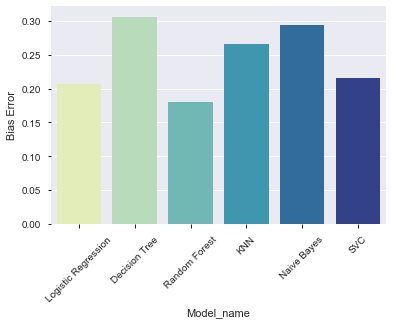

In [20]:
sns.barplot(x='Model_name',y='Test_bias',data=score,palette=sns.color_palette('YlGnBu'))
plt.xticks(rotation=45)
plt.ylabel('Bias Error')
plt.show()

# Tuned SVC

In [23]:
SVC1=SVC(0.1,kernel='poly',degree=3,gamma=0.1,random_state=42)
train,test=three_user_out_comb(SVC1,data3)
print('Mean Train Score is:',np.mean(train))
print('Bias Train Error is:', (1-np.mean(train)))
print('Var Train Error is:',(np.var(train,ddof=1)))
print('Mean Test Score is:',np.mean(test))
print('Bias Test Error is:', (1-np.mean(test)))
print('Var Test Error is:',(np.var(test,ddof=1)))

Mean Train Score is: 0.997090573980477
Bias Train Error is: 0.0029094260195230426
Var Train Error is: 5.582518755993671e-07
Mean Test Score is: 0.840827495103606
Bias Test Error is: 0.159172504896394
Var Test Error is: 0.0064699727144922675


# Bagged NB

In [24]:
param=[]
test_avg=[]
test_var=[]
NB=GaussianNB()
for p4 in np.arange(1,100,5):
        model=BaggingClassifier(base_estimator=NB,n_estimators=p4,n_jobs=-1)
        train,test=three_user_out_comb(model,data3)
        test_avg.append(np.mean(test))
        test_var.append(np.var(test,ddof=1))
        param.append(p4)

In [25]:
result6=pd.DataFrame({'f1_avg':test_avg,'var_error':test_var},index=param)
print(result6[result6.var_error==result6.var_error.min()])

result6[result6.f1_avg==result6.f1_avg.max()]

      f1_avg  var_error
31  0.743692   0.005439


f1_avg  var_error
36  0.762484   0.006487

In [26]:
print('Bagged_NB1')
baged_nb1=BaggingClassifier(base_estimator=NB,n_estimators=31,n_jobs=-1,random_state=42)
three_user_out_comb(baged_nb1,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Bagged_NB1

Train Score 0.976533224308921 Train var 0.0024204630985357996

Test Score 0.755182651109493 Test var 0.0026102456549007254


In [27]:
print('Bagged_NB2')
baged_nb2=BaggingClassifier(base_estimator=NB,n_estimators=36,n_jobs=-1,random_state=42)
three_user_out_comb(baged_nb2,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Bagged_NB2

Train Score 0.976533224308921 Train var 0.0024204630985357996

Test Score 0.755182651109493 Test var 0.0026102456549007254


# Boosting NB

In [5]:
param=[]
test_avg=[]
test_var=[]
NB=GaussianNB()
for p4 in np.arange(1,100):
        model=AdaBoostClassifier(base_estimator=NB,n_estimators=p4)
        train,test=three_user_out_comb(model,data3)
        test_avg.append(np.mean(test))
        test_var.append(np.var(test,ddof=1))
        param.append(p4)

In [6]:
result7=pd.DataFrame({'f1_avg':test_avg,'var_error':test_var},index=param)
print(result7[result7.var_error==result7.var_error.min()])

result7[result7.f1_avg==result7.f1_avg.max()]

      f1_avg  var_error
71  0.617701   0.005766


f1_avg  var_error
1  0.736667   0.005961

In [8]:
print('Boosted_NB1')
boost_nb1=AdaBoostClassifier(base_estimator=NB,n_estimators=1,random_state=42)
train_score,test_score=three_user_out_comb(boost_nb1,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Boosted_NB1

Train Score 0.8830983266398923 Train var 0.00040496172389654206

Test Score 0.7050518627048535 Test var 0.006569220962815903


In [9]:
print('Boosted_NB2')
boost_nb2=AdaBoostClassifier(base_estimator=NB,n_estimators=71,random_state=42)
train_score,test_score=three_user_out_comb(boost_nb2,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Boosted_NB2

Train Score 0.8150226776206269 Train var 0.0035568005790138375

Test Score 0.6122993809485934 Test var 0.01524643374518135


# Tunning KNN

In [10]:
param=[]
test_avg=[]
test_var=[]
for p2 in ['uniform','distance']:
    for p1 in np.arange(1,50):
        model=KNeighborsClassifier(n_neighbors=p1,weights=p2)
        train,test=three_user_out_comb(model,data3)
        test_avg.append(np.mean(test))
        test_var.append(np.var(test,ddof=1))
        param.append((p1,p2))

In [11]:
result9=pd.DataFrame({'f1_avg':test_avg,'var_error':test_var},index=param)
print(result9[result9.var_error==result9.var_error.min()])

result9[result9.f1_avg==result9.f1_avg.max()]

                 f1_avg  var_error
(45, uniform)  0.783791   0.001854


f1_avg  var_error
(28, distance)  0.811486   0.004216

In [12]:
print('Tuned_knn1')
Tuned_knn1=KNeighborsClassifier(n_neighbors=28,weights='distance',n_jobs=-1)
three_user_out_comb(Tuned_knn1,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Tuned_knn1

Train Score 0.8150226776206269 Train var 0.0035568005790138375

Test Score 0.6122993809485934 Test var 0.01524643374518135


In [13]:
print('Tuned_knn2')
Tuned_knn2=KNeighborsClassifier(n_neighbors=45,weights='distance',n_jobs=-1)
three_user_out_comb(Tuned_knn2,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Tuned_knn2

Train Score 0.8150226776206269 Train var 0.0035568005790138375

Test Score 0.6122993809485934 Test var 0.01524643374518135


# Bagged LR

In [8]:
param=[]
test_avg=[]
test_var=[]
LR=LogisticRegression(n_jobs=-1,random_state=42,solver='saga')
for p3 in np.arange(1,100,4):
        model=BaggingClassifier(base_estimator=LR,n_estimators=p3,n_jobs=-1)
        train,test=three_user_out_comb(model,data3)
        test_avg.append(np.mean(test))
        test_var.append(np.var(test,ddof=1))
        param.append(p3)

In [9]:
result1=pd.DataFrame({'f1_avg':test_avg,'var_error':test_var},index=param)

print(result1[result1.var_error==result1.var_error.min()])

result1[result1.f1_avg==result1.f1_avg.max()]

      f1_avg  var_error
53  0.795171    0.00355


f1_avg  var_error
33  0.824966   0.004639

In [15]:
lr=LogisticRegression(n_jobs=-1,random_state=42,solver='saga')
print('Bagged_Lr')
Bagged_Lr=BaggingClassifier(base_estimator=lr,n_estimators=33,n_jobs=-1)
train_score,test_score=three_user_out_comb(Bagged_Lr,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Bagged_Lr

Train Score 0.9832653796054477 Train var 1.2174874563810346e-05

Test Score 0.7712114318850665 Test var 0.006199535568553519


In [16]:
lr1=LogisticRegression(n_jobs=-1,random_state=42,solver='saga')
print('Bagged_Lr1')
Bagged_Lr1=BaggingClassifier(base_estimator=lr1,n_estimators=53,n_jobs=-1)
train_score,test_score=three_user_out_comb(Bagged_Lr1,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Bagged_Lr1

Train Score 0.983524268378398 Train var 1.3235382900127118e-05

Test Score 0.7652500919423446 Test var 0.009564003868048879


# Boosted LR

In [ ]:
param=[]
test_avg=[]
test_var=[]
LR=LogisticRegression(n_jobs=-1,random_state=42,solver='saga')
for p3 in np.arange(1,200,2):
        model=AdaBoostClassifier(base_estimator=LR,n_estimators=p3,random_state=42)
        train,test=three_user_out_comb(model,data3)
        test_avg.append(np.mean(test))
        test_var.append(np.var(test,ddof=1))
        param.append(p3)

In [75]:
result2=pd.DataFrame({'f1_avg':test_avg,'var_error':test_var},index=param)
print(result2[result2.var_error==result2.var_error.min()])
result2[result2.f1_avg==result2.f1_avg.max()]

    f1_avg  var_error
5  0.70547   0.007229


f1_avg  var_error
9  0.754879   0.011687

In [7]:
lr=LogisticRegression(n_jobs=-1,random_state=42,solver='saga')
print('Boosted_Lr')
Boosted_Lr=AdaBoostClassifier(base_estimator=lr,n_estimators=5)
train_score,test_score=three_user_out_comb(Boosted_Lr,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Boosted_Lr

Train Score 0.8319396181227805 Train var 0.0009126557715678526

Test Score 0.7171989693823206 Test var 0.007220127632332592


In [8]:
lr1=LogisticRegression(n_jobs=-1,random_state=42,solver='saga')
print('Boosted_Lr1')
Boosted_Lr1=AdaBoostClassifier(base_estimator=lr,n_estimators=9)
train_score,test_score=three_user_out_comb(Boosted_Lr1,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Boosted_Lr1

Train Score 0.8657853555518036 Train var 0.0011518090440332228

Test Score 0.7405918960378909 Test var 0.0051792297087084145


# Tuning DT

In [57]:
param=[]
test_avg=[]
test_var=[]
for p2 in ['gini','entropy']:
    for p3 in np.arange(1,20):
        for p4 in np.arange(1,20):
            model=DecisionTreeClassifier(criterion=p2,max_depth=p3,min_samples_leaf=p4,random_state=42)
            train,test=three_user_out_comb(model,data3)
            test_avg.append(np.mean(test))
            test_var.append(np.var(test,ddof=1))
            param.append((p2,p3,p4))

In [ ]:
result=pd.DataFrame({'f1_avg':test_avg,'var_error':test_var},index=param)

In [59]:
print(result[result.var_error==result.var_error.min()])

result[result.f1_avg==result.f1_avg.max()]

                    f1_avg  var_error
(gini, 1, 1)      0.217618    0.00056
(gini, 1, 2)      0.217618    0.00056
(gini, 1, 3)      0.217618    0.00056
(gini, 1, 4)      0.217618    0.00056
(gini, 1, 5)      0.217618    0.00056
(gini, 1, 6)      0.217618    0.00056
(gini, 1, 7)      0.217618    0.00056
(gini, 1, 8)      0.217618    0.00056
(gini, 1, 9)      0.217618    0.00056
(gini, 1, 10)     0.217618    0.00056
(gini, 1, 11)     0.217618    0.00056
(gini, 1, 12)     0.217618    0.00056
(gini, 1, 13)     0.217618    0.00056
(gini, 1, 14)     0.217618    0.00056
(gini, 1, 15)     0.217618    0.00056
(gini, 1, 16)     0.217618    0.00056
(gini, 1, 17)     0.217618    0.00056
(gini, 1, 18)     0.217618    0.00056
(gini, 1, 19)     0.217618    0.00056
(entropy, 1, 1)   0.217618    0.00056
(entropy, 1, 2)   0.217618    0.00056
(entropy, 1, 3)   0.217618    0.00056
(entropy, 1, 4)   0.217618    0.00056
(entropy, 1, 5)   0.217618    0.00056
(entropy, 1, 6)   0.217618    0.00056
(entropy, 1,

f1_avg  var_error
(entropy, 8, 2)  0.751275   0.004137

In [9]:
dtree1=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=2,random_state=42)
train_score,test_score=three_user_out_comb(dtree1,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))


Train Score 0.99713487078303 Train var 2.9249337687803484e-06

Test Score 0.6783711234730586 Test var 0.006733394348396432


# Boosted DT

In [86]:
param=[]
test_avg=[]
test_var=[]
dtree1=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=2,random_state=42)
for p4 in np.arange(1,100):
        model=AdaBoostClassifier(base_estimator=dtree1,n_estimators=p4)
        train,test=three_user_out_comb(model,data3)
        test_avg.append(np.mean(test))
        test_var.append(np.var(test,ddof=1))
        param.append(p4)

In [87]:
result3=pd.DataFrame({'f1_avg':test_avg,'var_error':test_var},index=param)

In [88]:
print(result3[result3.var_error==result3.var_error.min()])

result3[result3.f1_avg==result3.f1_avg.max()]

      f1_avg  var_error
16  0.749629   0.000241


f1_avg  var_error
14  0.828542   0.001194

In [21]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=2,random_state=42)
Boosted_DT1=AdaBoostClassifier(base_estimator=dt1,n_estimators=14)
train_score,test_score=three_user_out_comb(Boosted_DT1,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))


Train Score 1.0 Train var 0.0

Test Score 0.7719335030488877 Test var 0.004986791627870554


In [22]:
dt2=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=2,random_state=42)
Boosted_DT2=AdaBoostClassifier(base_estimator=dt2,n_estimators=16)
train_score,test_score=three_user_out_comb(Boosted_DT2,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))


Train Score 1.0 Train var 0.0

Test Score 0.7767621899133067 Test var 0.007506513848828535


# Bagged DT

In [37]:
param=[]
test_avg=[]
test_var=[]
dtree1=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=2,random_state=42)
for p4 in np.arange(1,100):
        model=BaggingClassifier(base_estimator=dtree1,n_estimators=p4)
        train,test=three_user_out_comb(model,data3)
        test_avg.append(np.mean(test))
        test_var.append(np.var(test,ddof=1))
        param.append(p4)

In [38]:
result4=pd.DataFrame({'f1_avg':test_avg,'var_error':test_var},index=param)

In [39]:
print(result4[result4.var_error==result4.var_error.min()])

result4[result4.f1_avg==result4.f1_avg.max()]

     f1_avg  var_error
9  0.769881   0.002006


f1_avg  var_error
29  0.780057   0.004649

In [19]:
dt3=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=2,random_state=42)
Bagged_DT1=BaggingClassifier(base_estimator=dt3,n_estimators=29)
train_score,test_score=three_user_out_comb(Bagged_DT1,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))


Train Score 0.9974088256770431 Train var 5.180445406835548e-06

Test Score 0.7359672060864976 Test var 0.008752357411407105


In [20]:
dt4=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=2,random_state=42)
Bagged_DT2=BaggingClassifier(base_estimator=dt4,n_estimators=9)
train_score,test_score=three_user_out_comb(Bagged_DT2,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))


Train Score 0.998126075791802 Train var 1.2878156168503407e-06

Test Score 0.7097744673153793 Test var 0.005393173818905652


# Tunning Random Forest

In [14]:
param=[]
test_avg=[]
test_var=[]
for p3 in np.arange(1,150,5):
        model=RandomForestClassifier(n_estimators=p3,random_state=42,n_jobs=-1)
        train,test=three_user_out_comb(model,data3)
        test_avg.append(np.mean(test))
        test_var.append(np.var(test,ddof=1))
        param.append((p3))

In [15]:
result=pd.DataFrame({'f1_avg':test_avg,'var_error':test_var},index=param)

In [16]:
print(result[result.var_error==result.var_error.min()])

result[result.f1_avg==result.f1_avg.max()]

       f1_avg  var_error
136  0.838835   0.002989


f1_avg  var_error
121  0.853237   0.003084

In [17]:
rf2=RandomForestClassifier(criterion='gini',n_estimators=136,random_state=42,n_jobs=-1)
train_score,test_score=three_user_out_comb(rf2,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))


Train Score 1.0 Train var 0.0

Test Score 0.8180129217889572 Test var 0.0069021058594192315


In [18]:
rf2=RandomForestClassifier(criterion='gini',n_estimators=121,random_state=42,n_jobs=-1)
train_score,test_score=three_user_out_comb(rf2,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))


Train Score 1.0 Train var 0.0

Test Score 0.8477532306143238 Test var 0.004544165311505663


# Boosted RF

In [19]:
param=[]
test_avg=[]
test_var=[]
rf2=RandomForestClassifier(criterion='gini',n_estimators=121,random_state=42,n_jobs=-1)
for p4 in np.arange(1,15):
    model=AdaBoostClassifier(base_estimator=rf2,n_estimators=p4)
    train,test=three_user_out_comb(model,data3)
    test_avg.append(np.mean(test))
    test_var.append(np.var(test,ddof=1))
    param.append(p4)

In [20]:
result5=pd.DataFrame({'f1_avg':test_avg,'var_error':test_var},index=param)

In [21]:
print(result5[result5.var_error==result5.var_error.min()])

result5[result5.f1_avg==result5.f1_avg.max()]

      f1_avg  var_error
14  0.833195   0.002215


f1_avg  var_error
12  0.850828   0.004124

In [22]:
rf5=RandomForestClassifier(criterion='gini',n_estimators=121,random_state=42,n_jobs=-1)
Boosted_RF=AdaBoostClassifier(base_estimator=rf5,n_estimators=12)
train_score,test_score=three_user_out_comb(Boosted_RF,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))


Train Score 1.0 Train var 0.0

Test Score 0.8471400586459319 Test var 0.004567984227876312


In [23]:
rf6=RandomForestClassifier(criterion='gini',n_estimators=81,random_state=42,n_jobs=-1)
Boosted_RF1=AdaBoostClassifier(base_estimator=rf6,n_estimators=14)
train_score,test_score=three_user_out_comb(Boosted_RF1,data3)
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))


Train Score 1.0 Train var 0.0

Test Score 0.8146084460525165 Test var 0.00653543803677939


In [24]:
lr=LogisticRegression(n_jobs=-1,random_state=42,solver='saga')
Bagged_Lr=BaggingClassifier(base_estimator=lr,n_estimators=33,n_jobs=-1)
train_score,test_score=three_user_out_comb(Bagged_Lr,data3)

lr1=LogisticRegression(n_jobs=-1,random_state=42,solver='saga')
Boosted_Lr=AdaBoostClassifier(base_estimator=lr1,n_estimators=9)
train_score,test_score=three_user_out_comb(Boosted_Lr,data3)

dt=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=2,random_state=42)
Bagged_DT=BaggingClassifier(base_estimator=dt,n_estimators=29)
train_score,test_score=three_user_out_comb(Bagged_DT,data3)

dt1=DecisionTreeClassifier(criterion='entropy',max_depth=8,min_samples_leaf=2,random_state=42)
Boosted_DT=AdaBoostClassifier(base_estimator=dt1,n_estimators=14)
train_score,test_score=three_user_out_comb(Boosted_DT,data3)

rf=RandomForestClassifier(criterion='gini',n_estimators=121,random_state=42,n_jobs=-1)
Boosted_RF=AdaBoostClassifier(base_estimator=rf,n_estimators=12)
train_score,test_score=three_user_out_comb(Boosted_RF,data3)

NB=GaussianNB()
Boosted_NB=AdaBoostClassifier(base_estimator=NB,n_estimators=1,random_state=42)
three_user_out_comb(Boosted_NB,data3)

NB1=GaussianNB()
Bagged_NB=BaggingClassifier(base_estimator=NB1,n_estimators=36,n_jobs=-1,random_state=42)
three_user_out_comb(Bagged_NB,data3)

Tuned_knn=KNeighborsClassifier(n_neighbors=28,weights='distance',n_jobs=-1)
three_user_out_comb(Tuned_knn,data3)

svc=SVC(0.1,kernel='poly',degree=3,gamma=0.1,random_state=42)
train,test=three_user_out_comb(svc,data3)

In [25]:
models=[]
models.append(('Bagged Logistic Regression',Bagged_Lr))
models.append(('Boosted Logistic Regression',Boosted_Lr))
models.append(('Bagged Decision Tree',Bagged_DT))
models.append(('Boosted Decision Tree',Boosted_DT))
models.append(('Boosted Random Forest',Boosted_RF))
models.append(('Boosted Naive Bayes',Boosted_NB))
models.append(('Bagged Naive Bayes',Bagged_NB))
models.append(('Tunned Knn',Tuned_knn))
models.append(('Tuned SVC',svc))

In [26]:
train_score=[]
train_var=[]
test_score=[]
test_var=[]
train_bias=[]
test_bias=[]
name_list=[]
for name,model in models:
    train,test=three_user_out_comb(model,data3)
    train_score.append(np.mean(train))
    test_score.append(np.mean(test))
    train_var.append(np.var(train,ddof=1))
    test_var.append(np.var(test,ddof=1))
    train_bias.append(np.mean(1-np.array(train)))
    test_bias.append(np.mean(1-np.array(test)))
    name_list.append(name)
score=pd.DataFrame({'Model_name':name_list,'Train_score':train_score,'Test_score':test_score,'Train_var':train_var,'Test_var':test_var,'Train_bias':train_bias,'Test_bias':test_bias})
score

Model_name  Train_score  Test_score     Train_var  \
0   Bagged Logistic Regression     0.982970    0.821750  1.668856e-05   
1  Boosted Logistic Regression     0.862276    0.735141  1.201617e-03   
2         Bagged Decision Tree     0.997931    0.752357  1.124905e-06   
3        Boosted Decision Tree     1.000000    0.788674  0.000000e+00   
4        Boosted Random Forest     1.000000    0.809481  0.000000e+00   
5          Boosted Naive Bayes     0.879055    0.735869  5.979450e-04   
6           Bagged Naive Bayes     0.879843    0.731501  6.146775e-04   
7                   Tunned Knn     1.000000    0.808329  0.000000e+00   
8                    Tuned SVC     0.997379    0.865142  9.503270e-07   

   Test_var  Train_bias  Test_bias  
0  0.004961    0.017030   0.178250  
1  0.005066    0.137724   0.264859  
2  0.006493    0.002069   0.247643  
3  0.005881    0.000000   0.211326  
4  0.008213    0.000000   0.190519  
5  0.007963    0.120945   0.264131  
6  0.005801    0.120157   0.268499  
7  0.003569    0.000000   0.191671  
8  0.005160    0.002621   0.134858

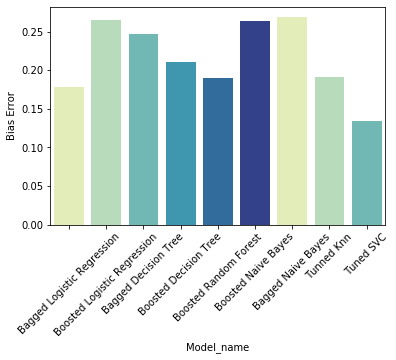

In [27]:
sns.barplot(x='Model_name',y='Test_bias',data=score,palette=sns.color_palette('YlGnBu'))
plt.xticks(rotation=45)
plt.ylabel('Bias Error')
plt.show()

# Confusion Matrix for One-User-Out-Metric Best Models

In [9]:
def Confusion_Matrix(data,model):
    '''  
    Input: dataframe , Model object
    
    Returns: Train_score,Test_score
    '''
    sc=StandardScaler()
    user=data.User.unique()
    test_score=[]
    train_score=[]
    test_true=[]
    test_pred=[]
    
    for i in user:
        X_train=data[data.User!=i].drop(columns=['User','Class'])
        y_train=data[data.User!=i].Class
        X_test=data[data.User==i].drop(columns=['User','Class'])
        y_test=data[data.User==i].Class
        
        X_train_scaled=sc.fit_transform(X_train)
        X_test_scaled=sc.transform(X_test)
        
        model.fit(X_train_scaled,y_train)
        test_true.extend(y_test)
        test_pred.extend(model.predict(X_test_scaled))
        
        train_score.append(f1_score(y_train,model.predict(X_train_scaled),average='weighted'))
        
        test_score.append(f1_score(y_test,model.predict(X_test_scaled),average='weighted'))
    return(test_true,test_pred,train_score,test_score)


In [28]:
lr=LogisticRegression(solver='saga',random_state=42)
print('Logistic Regression')
test_true,test_pred,train_score,test_score=Confusion_Matrix(data,lr)
print('Confusion Matrix \n', confusion_matrix(test_true,test_pred))
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Logistic Regression
Confusion Matrix 
 [[13885    48   140    23    25]
 [   76 12656    25   459  1539]
 [  790   126 13856   352    64]
 [ 2225   974  1300  9758   216]
 [  687  2003    57   704 12235]]

Train Score 0.9783238704106574 Train var 6.0292283639883455e-06

Test Score 0.8237541004597793 Test var 0.013189792353261882


In [29]:
rf=RandomForestClassifier(n_estimators=42,criterion='entropy',max_depth=10,min_samples_split=17,n_jobs=-1,random_state=42)
print('Random Forest')
test_true,test_pred,train_score,test_score=Confusion_Matrix(data,rf)
print('Confusion Matrix \n', confusion_matrix(test_true,test_pred))
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Random Forest
Confusion Matrix 
 [[12539   441   640    29   472]
 [    9 13881    29    54   782]
 [  315   144 13816   237   676]
 [   30   642  1309 11462  1030]
 [   50  1924    36    21 13655]]

Train Score 0.9998166861474136 Train var 3.5352117855439497e-09

Test Score 0.8694341929094501 Test var 0.014434486982811441


In [30]:
svc=SVC(0.1,kernel='poly',degree=3,gamma=0.1,random_state=42)
print('SVC')
test_true,test_pred,train_score,test_score=Confusion_Matrix(data,svc)
print('Confusion Matrix \n', confusion_matrix(test_true,test_pred))
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

SVC
Confusion Matrix 
 [[13838    49   153    23    58]
 [   57 13260    76   584   778]
 [  312     0 13638  1030   208]
 [  133     5  2626 11434   275]
 [    2   883   591   447 13763]]

Train Score 0.9972872069851116 Train var 2.413184552513602e-07

Test Score 0.8881193339720012 Test var 0.011435697971320557


# Voting Classifier

In [31]:
from sklearn.ensemble import VotingClassifier
clf1=LogisticRegression(solver='saga',random_state=42)
clf2=RandomForestClassifier(n_estimators=42,criterion='entropy',max_depth=10,min_samples_split=17,n_jobs=-1,random_state=42)
clf3=SVC(0.1,kernel='poly',degree=3,gamma=0.1,random_state=42)
print('Voting Classifier One-User-Out-Metric')
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
test_true,test_pred,train_score,test_score=Confusion_Matrix(data,eclf1)
print('Confusion Matrix \n', confusion_matrix(test_true,test_pred))
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Voting Classifier One-User-Out-Metric
Confusion Matrix 
 [[13849    48   152    23    49]
 [   70 13731    49    70   835]
 [  384   140 14438   121   105]
 [ 1374   978  1236 10671   214]
 [  518   829    60   352 13927]]

Train Score 0.997597754162526 Train var 2.314563332967544e-07

Test Score 0.8905947257937088 Test var 0.007235635531937545


In [10]:
from sklearn.ensemble import VotingClassifier
clf1=LogisticRegression(solver='saga',random_state=42)
clf2=RandomForestClassifier(n_estimators=42,criterion='entropy',max_depth=10,min_samples_split=17,n_jobs=-1,random_state=42)
clf3=SVC(0.1,kernel='poly',degree=3,gamma=0.1,random_state=42,probability=True)
print('Voting Classifier One-User-Out-Metric')
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='soft')
test_true,test_pred,train_score,test_score=Confusion_Matrix(data,eclf1)
print('Confusion Matrix \n', confusion_matrix(test_true,test_pred))
print('\nTrain Score',np.mean(train_score),'Train var',np.var(train_score,ddof=1))
print('\nTest Score',np.mean(test_score),'Test var',np.var(test_score,ddof=1))

Voting Classifier One-User-Out-Metric
Confusion Matrix 
 [[13855    48   162    23    33]
 [   44 13701    48   225   737]
 [  272   124 14267   423   102]
 [  387   911  2260 10706   209]
 [  307   901    62   389 14027]]

Train Score 0.9975908261320415 Train var 2.1742813182810169e-07

Test Score 0.8895864929222257 Test var 0.009419873617825326


In [38]:
from sklearn.ensemble import VotingClassifier
clf1=LogisticRegression(solver='saga',random_state=42)
clf2=RandomForestClassifier(n_estimators=42,criterion='entropy',max_depth=10,min_samples_split=17,n_jobs=-1,random_state=42)
clf3=SVC(0.1,kernel='poly',degree=3,gamma=0.1,random_state=42)
print('Voting Classifier Three-User-Out-Metric')
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
train,test=three_user_out_comb(eclf1,data3)
print('\nTrain Score',np.mean(train),'Train var',np.var(train,ddof=1))
print('\nTest Score',np.mean(test),'Test var',np.var(test,ddof=1))

Voting Classifier Three-User-Out-Metric

Train Score 0.997879994033291 Train var 7.611079867838138e-07

Test Score 0.8554069798417429 Test var 0.0033582142652505676
